# Background of The Problem

<b>The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C,  Fibrosis, Cirrhosis ).</b>

[Background of the Disease](https://labtestsonline.org/conditions/hepatitis)

[reference_link](https://www.cdc.gov/hepatitis/hcv/hcvfaq.htm)

## Who is at risk for hepatitis C infection?
The following people are at increased risk for hepatitis C:

- People with HIV infection
- Current or former people who use injection drugs (PWID), including those who injected only once many years ago
- People with selected medical conditions, including those who ever received maintenance hemodialysis (4,5)
- Prior recipients of transfusions or organ transplants, including people who received clotting factor concentrates produced before 1987, people who received a transfusion of blood or blood components before July 1992, people who received an organ transplant before July 1992, and people who were notified that they received blood from a donor who later tested positive for HCV infection
- Health care, emergency medical, and public safety personnel after needle sticks, sharps, or mucosal exposures to HCV-positive blood
- Children born to mothers with HCV infection

## Who is more likely to develop cirrhosis after becoming infected with HCV?
Rates of progression to cirrhosis are increased in the presence of a variety of factors, including

- Being male
- Being age >50 years
- Consuming alcohol
- Having nonalcoholic fatty liver disease, hepatitis B, or HIV coinfection
- Receiving immunosuppressive therapy (6,7,8)

## What are the signs and symptoms of chronic HCV infection?
Most people with chronic HCV infection are asymptomatic or have non-specific symptoms such as chronic fatigue and depression. Many eventually <b> develop chronic liver disease, which can range from mild to severe, including cirrhosis and liver cancer. </b> Chronic liver disease in HCV-infected people is usually insidious, progressing slowly without any signs or symptoms for several decades. In fact, HCV infection is often not recognized until asymptomatic people are identified as HCV-positive when screened for blood donation or when elevated alanine aminotransferase (ALT, a liver enzyme) levels are detected during routine examinations.

## Tests
There are several laboratory tests that may be performed in cases of known or suspected hepatitis. These tests may fall into one or more of the following categories:

- General chemistry tests to detect liver inflammation and/or damage
- Screening tests to detect viral hepatitis; for example, screening for exposure to hepatitis B or hepatitis C may be done because of increased risk of the disease (use of illegal drugs, multiple sex partners) or at the time of blood donation.
- Tests to help diagnose other underlying causes of hepatitis
- Tests to monitor the progression of liver damage and/or help guide treatment

## Assumption for Variables
- ALB - [ALbumin](https://labtestsonline.org/tests/albumin) (produced in liver)
- ALP - [Alkaline Phosphatase Level](https://www.healthline.com/health/alp) (small increased when liver damaged)
- ALT - [Alanine Aminotransferase](https://labtestsonline.org/tests/alanine-aminotransferase-alt#:~:text=Alanine%20aminotransferase%20(ALT)%20is%20an,blood%20and%20the%20level%20increases.) (released when liver injured)
- AST - [Asparte-Aminotransferase](https://labtestsonline.org/tests/aspartate-aminotransferase-ast) (released when liver injured)
- BIL - [Bilirubin](https://labtestsonline.org/tests/bilirubin) (increasing meaning there are something abnormal happening in the liver)
- CHE - [Cholinesterases](https://labtestsonline.org/tests/cholinesterase-tests) (Enzyme founds in liver for nervous system)
- CHOL - [Cholesterol](https://labtestsonline.org/tests/cholesterol) (not really related somehow)
- CREA - [Creatinine](https://labtestsonline.org/tests/creatinine) (test for kidney injury)
- GGT - [Gamma-Glutamyl Transferase](https://labtestsonline.org/tests/gamma-glutamyl-transferase-ggt) (can increase when liver injured)
- PROT - [Total Protein, Albumin-Globulin (A/G) Ratio](https://labtestsonline.org/tests/total-protein-albumin-globulin-ag-ratio)

# Setup

## Load Libraries

In [1]:
library('caret')
library('plyr')
library('dplyr')
library('mlbench')
library('ggplot2')
library('plotly')
library('psych')
library('repr')
library('reshape2')
library('scatterplot3d')


Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'plotly'

The following objects are masked from 'package:plyr':

    arrange, mutate, rename, summarise

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



## Settings

In [2]:
# par()              # view current settings
opar <- par()      # make a copy of current settings
# par(opar)          # restore original settings  

In [3]:
set.seed(1)

## Global Function

In [4]:
# Get lower triangle of the correlation matrix
get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
}

# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
}

reorder_cormat <- function(cormat){
    # Use correlation between variables as distance
    dd <- as.dist((1-cormat)/2)
    hc <- hclust(dd)
    cormat <-cormat[hc$order, hc$order]
}

# Data

## Preview

In [5]:
path <- '../data/hepatitisC.csv'
hepc.backup <- read.csv(path)
hepc <- read.csv(path)

In [6]:
# dimension of data
dim(hepc)

# view the first 5 rows of data
head(hepc)

# view the last 5 rows of data
tail(hepc)

[1] 615  13

Category    Age Sex ALB  ALP  ALT  AST  BIL  CHE   CHOL CREA GGT  PROT
1 Blood Donor 32  m   38.5 52.5  7.7 22.1  7.5  6.93 3.23 106  12.1 69.0
2 Blood Donor 32  m   38.5 70.3 18.0 24.7  3.9 11.17 4.80  74  15.6 76.5
3 Blood Donor 32  m   46.9 74.7 36.2 52.6  6.1  8.84 5.20  86  33.2 79.3
4 Blood Donor 32  m   43.2 52.0 30.6 22.6 18.9  7.33 4.74  80  33.8 75.7
5 Blood Donor 32  m   39.2 74.1 32.6 24.8  9.6  9.15 4.32  76  29.9 68.7
6 Blood Donor 32  m   41.6 43.3 18.5 19.7 12.3  9.92 6.05 111  91.0 74.0

Category  Age Sex ALB ALP   ALT   AST   BIL CHE  CHOL CREA  GGT   PROT
610 Cirrhosis 59  f   39   51.3  19.6 285.8 40  5.77 4.51 136.1 101.1 70.5
611 Cirrhosis 62  f   32  416.6   5.9 110.3 50  5.57 6.30  55.7 650.9 68.5
612 Cirrhosis 64  f   24  102.8   2.9  44.4 20  1.54 3.02  63.0  35.9 71.3
613 Cirrhosis 64  f   29   87.3   3.5  99.0 48  1.66 3.63  66.7  64.2 82.0
614 Cirrhosis 46  f   33     NA  39.0  62.0 20  3.56 4.20  52.0  50.0 71.0
615 Cirrhosis 59  f   36     NA 100.0  80.0 12  9.07 5.30  67.0  34.0 68.0

There are 615 rows with 13 columns. We can observe there are different categories for Cateogry & Sex columns, and all other columns is numeric as describe in the dataset information. However, we also noticed there are some missing values in the ALP columns.

In [7]:
summary(hepc$Category)

Blood Donor           Cirrhosis            Fibrosis           Hepatitis 
                533                  30                  21                  24 
suspect Blood Donor 
                  7

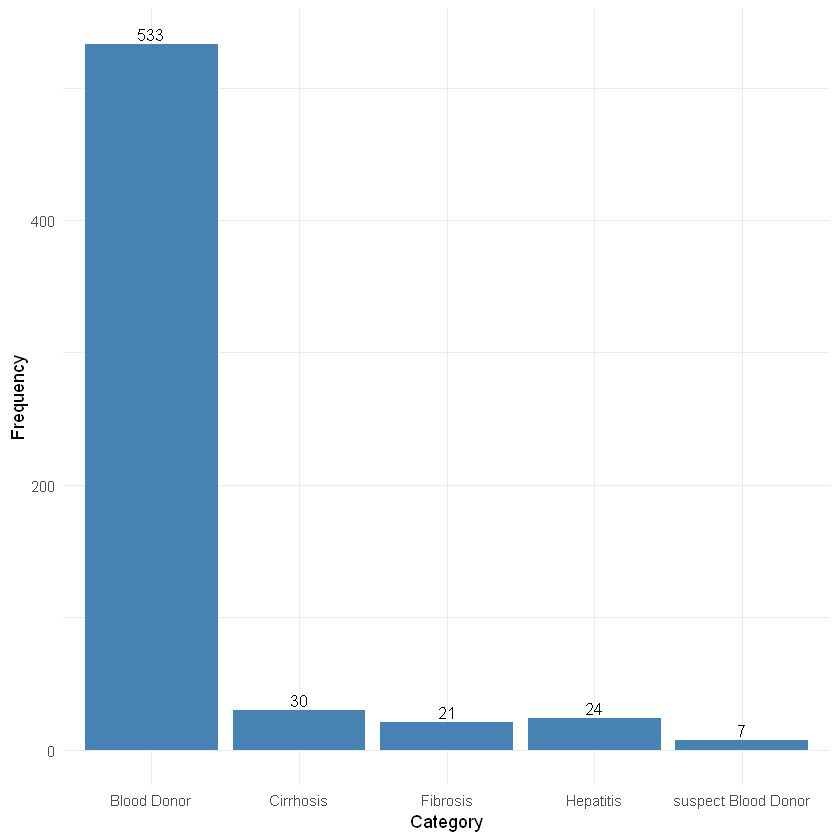

In [8]:
hepc.summary <- data.frame(table(hepc$Category))
names(hepc.summary) <- c('Category', 'Frequency')

ggplot(data=hepc.summary, aes(x=Category, y=Frequency)) +
        geom_bar(stat="identity", fill="steelblue")+
   geom_text(aes(label=Frequency), vjust=-0.3, size=3.5, alpha=1) + theme_minimal()

According to the question, we wanted to classify Hepatitis and Blood Donor. Hence, we will create another column to change the category. Besides, we might not want to include suspect blood donor at the moment.

- Hepatitis: Hepatitis,  Cirrhosis, Fibrosis
- Blood Donor

## Remove Suspect Blood Donor

In [9]:
# filter the suspect blood donor
mask <- hepc$Category != 'suspect Blood Donor'
hepc <- hepc[mask,]

In [10]:
summary(hepc$Category)

Blood Donor           Cirrhosis            Fibrosis           Hepatitis 
                533                  30                  21                  24 
suspect Blood Donor 
                  0

## General Category

In [11]:
# change the category
mask <- hepc$Category != 'Blood Donor'
hepc[mask, 'general_category'] <- 'Hepatitis'
hepc[!mask, 'general_category'] <- 'Blood Donor'

# remove unwanted category
hepc$Category <- factor(hepc$Category)
hepc$general_category <- factor(hepc$general_category)

summary(hepc$Category)
summary(hepc$general_category)

Blood Donor   Cirrhosis    Fibrosis   Hepatitis 
        533          30          21          24

Blood Donor   Hepatitis 
        533          75

Now we have 533 Blood Donor and 75 Hepatitis patients with diferrent stages.

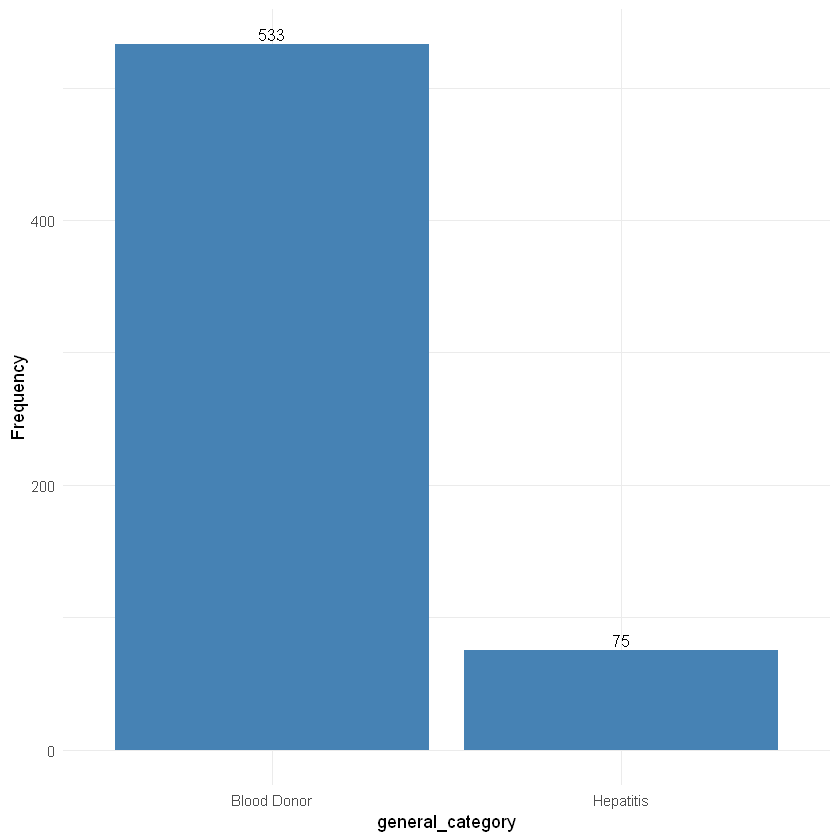

In [12]:
hepc.summary <- data.frame(table(hepc$general_category))
names(hepc.summary) <- c('general_category', 'Frequency')

ggplot(data=hepc.summary, aes(x=general_category, y=Frequency)) +
        geom_bar(stat="identity", fill="steelblue")+
   geom_text(aes(label=Frequency), vjust=-0.3, size=3.5, alpha=1) + theme_minimal()

## Handle Missing Value

In [13]:
# to check how many missing values is there
table(is.na(hepc))

# to check where the value located
apply(is.na(hepc), 2, which)

# taking missing columns
missing_cols <- colnames(hepc)[colSums(is.na(hepc)) > 0]
missing_cols


FALSE  TRUE 
 8481    31 

$Category
named integer(0)

$Age
named integer(0)

$Sex
named integer(0)

$ALB
604 
597 

$ALP
542 546 547 569 570 571 572 577 582 583 584 585 586 591 593 604 614 615 
535 539 540 562 563 564 565 570 575 576 577 578 579 584 586 597 607 608 

$ALT
541 
534 

$AST
named integer(0)

$BIL
named integer(0)

$CHE
named integer(0)

$CHOL
122 320 330 414 425 434 499 585 591 604 
122 320 330 414 425 434 499 578 584 597 

$CREA
named integer(0)

$GGT
named integer(0)

$PROT
591 
584 

$general_category
named integer(0)

[1] "ALB"  "ALP"  "ALT"  "CHOL" "PROT"

In [14]:
# preview before we impute missing values with median
summary(hepc[, missing_cols])

# impute missing value with median for each columns by category
for (col in missing_cols){
    hepc[, col] <- ave(hepc[, col], 
                       hepc$Category, 
                       FUN = function(x) ifelse(is.na(x), median(x, na.rm=TRUE), x)
                      )
}

# check on the is there any difference
summary(hepc[, missing_cols])

      ALB             ALP              ALT              CHOL      
 Min.   :20.00   Min.   : 11.30   Min.   :  0.90   Min.   :1.430  
 1st Qu.:39.00   1st Qu.: 52.50   1st Qu.: 16.40   1st Qu.:4.620  
 Median :42.00   Median : 66.00   Median : 23.00   Median :5.300  
 Mean   :41.82   Mean   : 67.82   Mean   : 27.60   Mean   :5.379  
 3rd Qu.:45.25   3rd Qu.: 79.53   3rd Qu.: 32.75   3rd Qu.:6.075  
 Max.   :82.20   Max.   :416.60   Max.   :258.00   Max.   :9.670  
 NA's   :1       NA's   :18       NA's   :1        NA's   :10     
      PROT      
 Min.   :51.00  
 1st Qu.:69.45  
 Median :72.20  
 Mean   :72.25  
 3rd Qu.:75.40  
 Max.   :90.00  
 NA's   :1      

      ALB             ALP              ALT              CHOL      
 Min.   :20.00   Min.   : 11.30   Min.   :  0.90   Min.   :1.430  
 1st Qu.:39.00   1st Qu.: 52.17   1st Qu.: 16.38   1st Qu.:4.617  
 Median :42.00   Median : 65.65   Median : 22.95   Median :5.305  
 Mean   :41.80   Mean   : 67.36   Mean   : 27.58   Mean   :5.373  
 3rd Qu.:45.23   3rd Qu.: 79.94   3rd Qu.: 32.67   3rd Qu.:6.060  
 Max.   :82.20   Max.   :416.60   Max.   :258.00   Max.   :9.670  
      PROT      
 Min.   :51.00  
 1st Qu.:69.47  
 Median :72.20  
 Mean   :72.25  
 3rd Qu.:75.40  
 Max.   :90.00  

A slight change. However it doesnt seems it impact the dataset. Hence we can ignore this at the moment.

In [15]:
# double check if value is imputed
table(is.na(hepc))


FALSE 
 8512 

## Numeric Columns

In [16]:
numeric_cols <- colnames(hepc)[lapply(hepc, is.numeric) > 0]
numeric_cols

[1] "Age"  "ALB"  "ALP"  "ALT"  "AST"  "BIL"  "CHE"  "CHOL" "CREA" "GGT" 
[11] "PROT"

Age is included in the column. However it might not be important.

## Selected Columns

In [17]:
selected_cols <- numeric_cols[-1]
selected_cols

[1] "ALB"  "ALP"  "ALT"  "AST"  "BIL"  "CHE"  "CHOL" "CREA" "GGT"  "PROT"

# Summary Statistics & Boxplot

## Summary Statistics on Numeric Columns

In [18]:
summary(hepc[, numeric_cols])

      Age             ALB             ALP              ALT        
 Min.   :19.00   Min.   :20.00   Min.   : 11.30   Min.   :  0.90  
 1st Qu.:39.00   1st Qu.:39.00   1st Qu.: 52.17   1st Qu.: 16.38  
 Median :47.00   Median :42.00   Median : 65.65   Median : 22.95  
 Mean   :47.29   Mean   :41.80   Mean   : 67.36   Mean   : 27.58  
 3rd Qu.:54.00   3rd Qu.:45.23   3rd Qu.: 79.94   3rd Qu.: 32.67  
 Max.   :77.00   Max.   :82.20   Max.   :416.60   Max.   :258.00  
      AST              BIL              CHE              CHOL      
 Min.   : 12.00   Min.   :  1.80   Min.   : 1.420   Min.   :1.430  
 1st Qu.: 21.60   1st Qu.:  5.30   1st Qu.: 6.950   1st Qu.:4.617  
 Median : 25.85   Median :  7.30   Median : 8.270   Median :5.305  
 Mean   : 34.37   Mean   : 11.47   Mean   : 8.205   Mean   :5.373  
 3rd Qu.: 32.80   3rd Qu.: 11.30   3rd Qu.: 9.585   3rd Qu.:6.060  
 Max.   :324.00   Max.   :254.00   Max.   :16.410   Max.   :9.670  
      CREA              GGT              PROT      
 Mi

From the table, we can observe that the ALB & PROT seems like a form of percentage where it does not exceed 100 which is matching with our variable assumption from the start.

In [19]:
hepc.sc <- scale(hepc[, numeric_cols])

## Boxplot

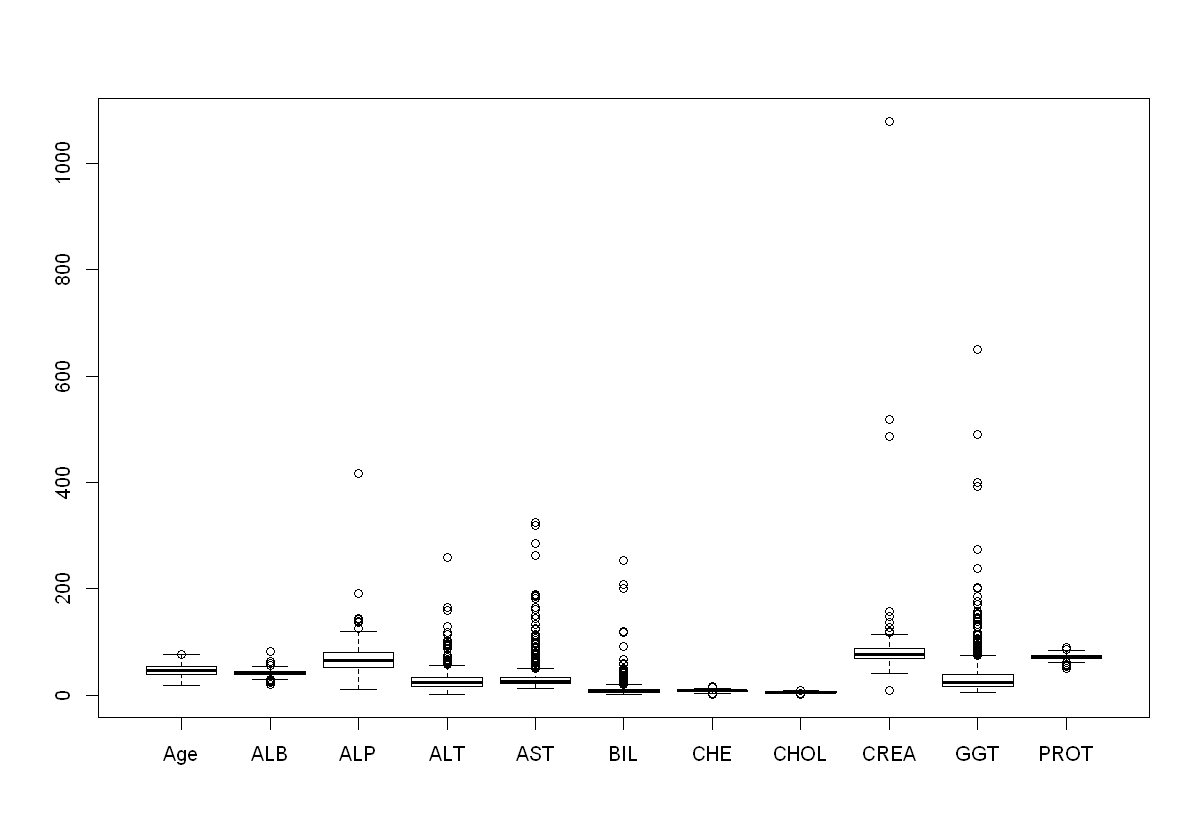

In [20]:
options(repr.plot.width=10, repr.plot.height=7) 
boxplot(hepc[, numeric_cols])

From the summary statistics, we observed that:
- the columns are having huge range of values which implies scaling might be needed.
- it seems like there's alot of outliers based on general overall trend.

## Boxplot - by Category

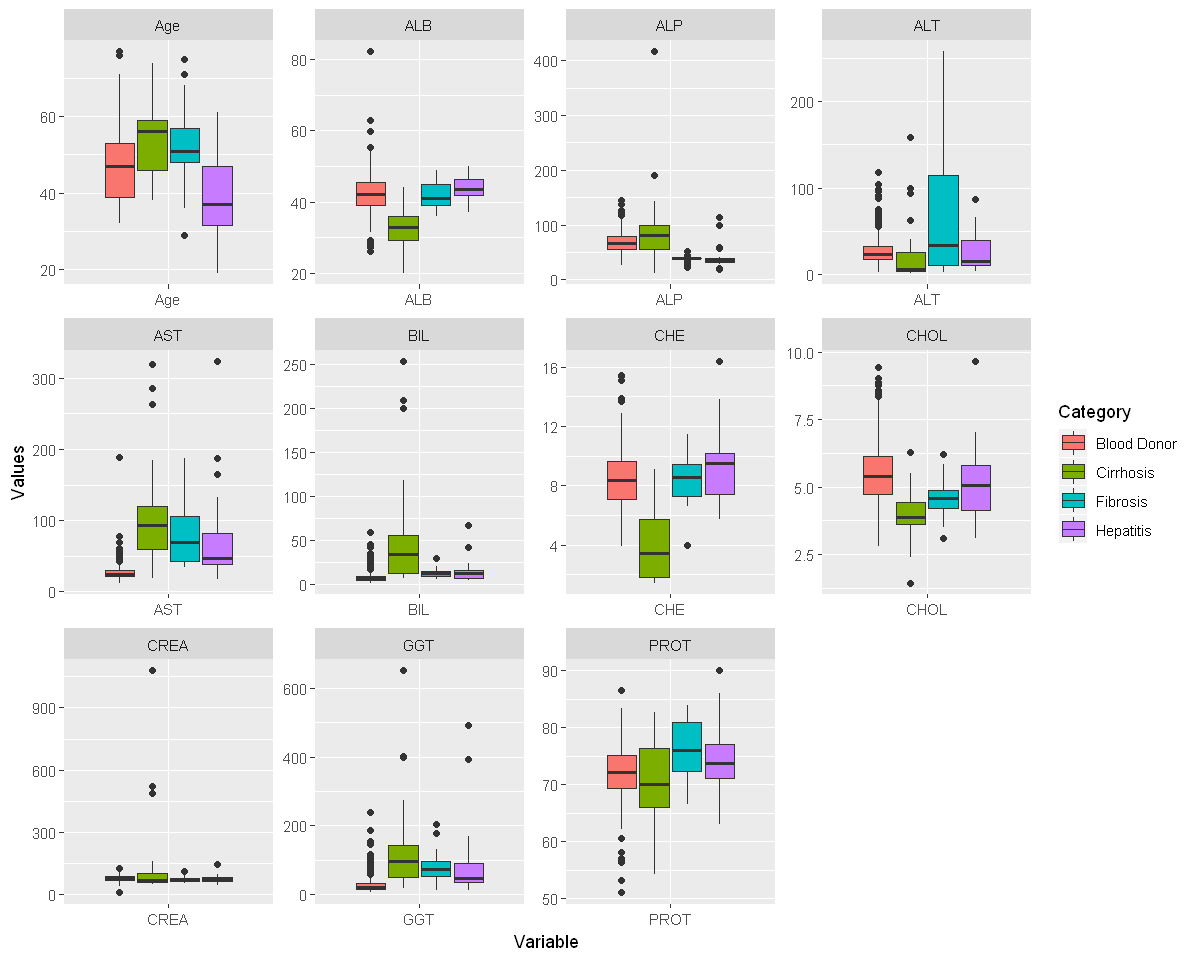

In [21]:
# melt the dataframe into suitable shape for plotting
hepc.mC <- melt(hepc[, c(numeric_cols, 'Category')], id.var='Category')

# change the width and height option
options(repr.plot.width=10, repr.plot.height=8) 
box_plot.C <- ggplot(data = hepc.mC, aes(x=variable, y=value)) + 
            geom_boxplot(aes_string(fill='Category')) + 
            facet_wrap( ~ variable, scales='free') + 
            xlab('Variable') + ylab('Values')
box_plot.C

From the box plot, (do note that the comparison is always between Sick Category and Non Sick Category when the terms relatively is used)
- generally, most of the distribution are skewed.
- Age: No obvious trend as it seems to have similar range for all 4 categories.
- ALB: Blood donor have a larger range compare to Hepatitis patient. Firbrosis and Hepatitis patient have a right skewed distribution.
- ALP: Fibrosis have relatively low values. (the skewness cannot be observe)
- ALT: Fibrosis have relatively larger range. All the patients seems to have a right skewed distribution.
- AST: Patients in general have higher values. (skewness itself different for each category)
- BIL: Cirrhosis have a larger range and higher value.
- CHE: Cirrhosis have relatively lower values.
- CHOL: Cirrhosis in general have lower values.
- CREA: No obvious trend.
- GGT: Even though there's alot of outlier in blood donor, however, we will deduce that Patients might have a higher values.
- PROT: No obvious trend.

All the points above, are observations / assumptions made to ease our task later on. It's not a definite conclusion until we futher analyse the dataset.

## Boxplot - by General Category

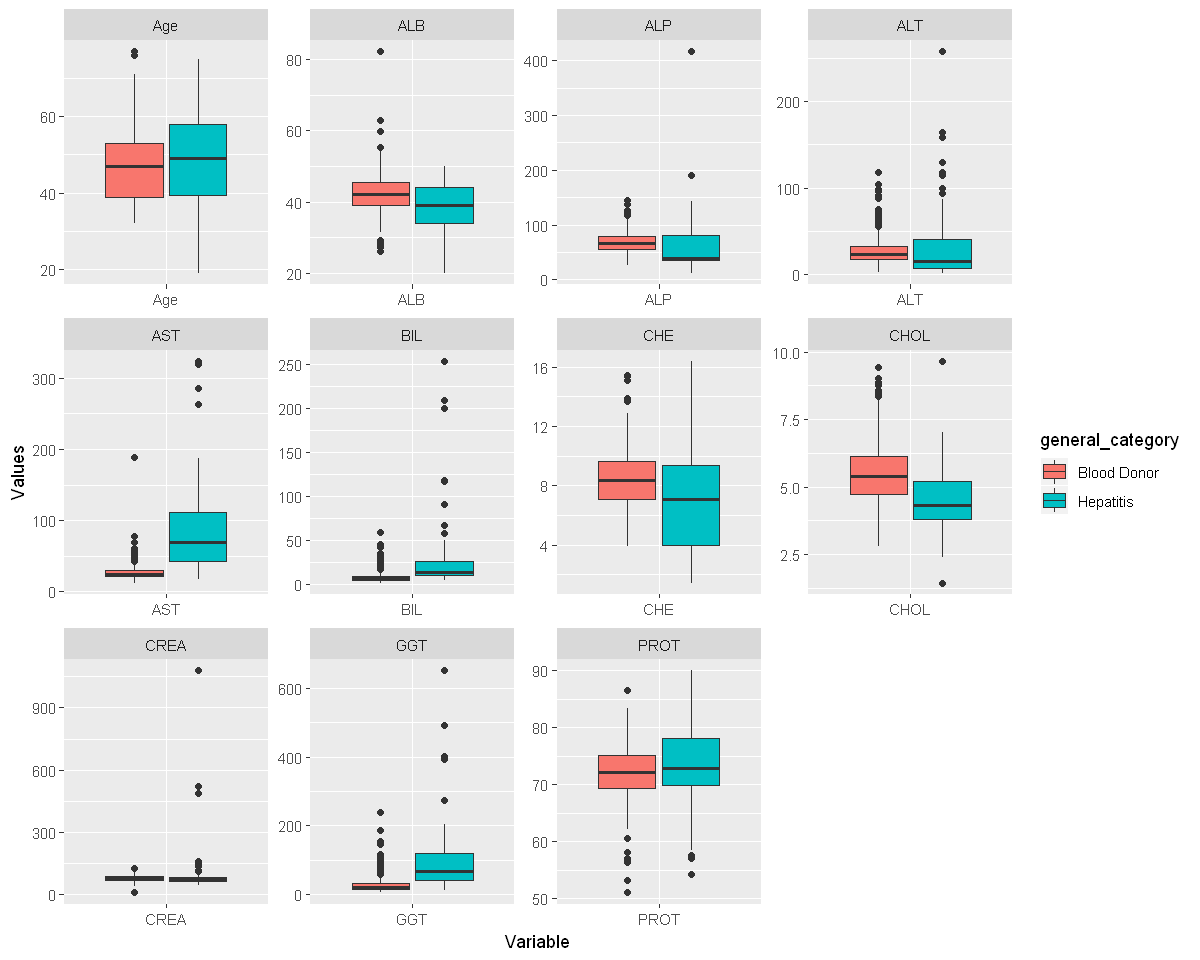

In [22]:
# melt the dataframe into suitable shape for plotting
hepc.mgc <- melt(hepc[, c(numeric_cols, 'general_category')], id.var='general_category')

# change the width and height option
options(repr.plot.width=10, repr.plot.height=8) 
box_plot.gc <- ggplot(data = hepc.mgc, aes(x=variable, y=value)) + 
            geom_boxplot(aes_string(fill='general_category')) + 
            facet_wrap( ~ variable, scales='free') + 
            xlab('Variable') + ylab('Values')
box_plot.gc 

As expected, the trend here will be easier to observe comparitively. Hence we will proceed with using general category instead of Category columns.

From the boxplot, (do note that Hepatitis here include Cirrhosis and Firbosis)
- We can observe in general, the blood donor seems to have normal distribution all times for each category. Beisdes, Hepatitis patients seems to have a right skewed distribution in general except for CHE.
- ALB: Hepatitis patient have lower values.
- ALP: Hepatitis patient have lower values.
- ALT: Hepatitis patient have lower values and larger range.
- AST: Hepatitis patient have higher values and larger range.
- BIL: Hepatitis patient have higher values and larger range.
- CHE: Hepatitis patient have lower values and larger range.
- CHOL: Hepatitis patient have lower values and smaller range.
- CREA: Couldnt observe the trend but Hepatitis patient have a lot of outliers which possibly can be an indicator.
- GGT: Hepatitis patient have higher values and larger range.
- PROT: No obvious trend.

## Boxplot - by Sex

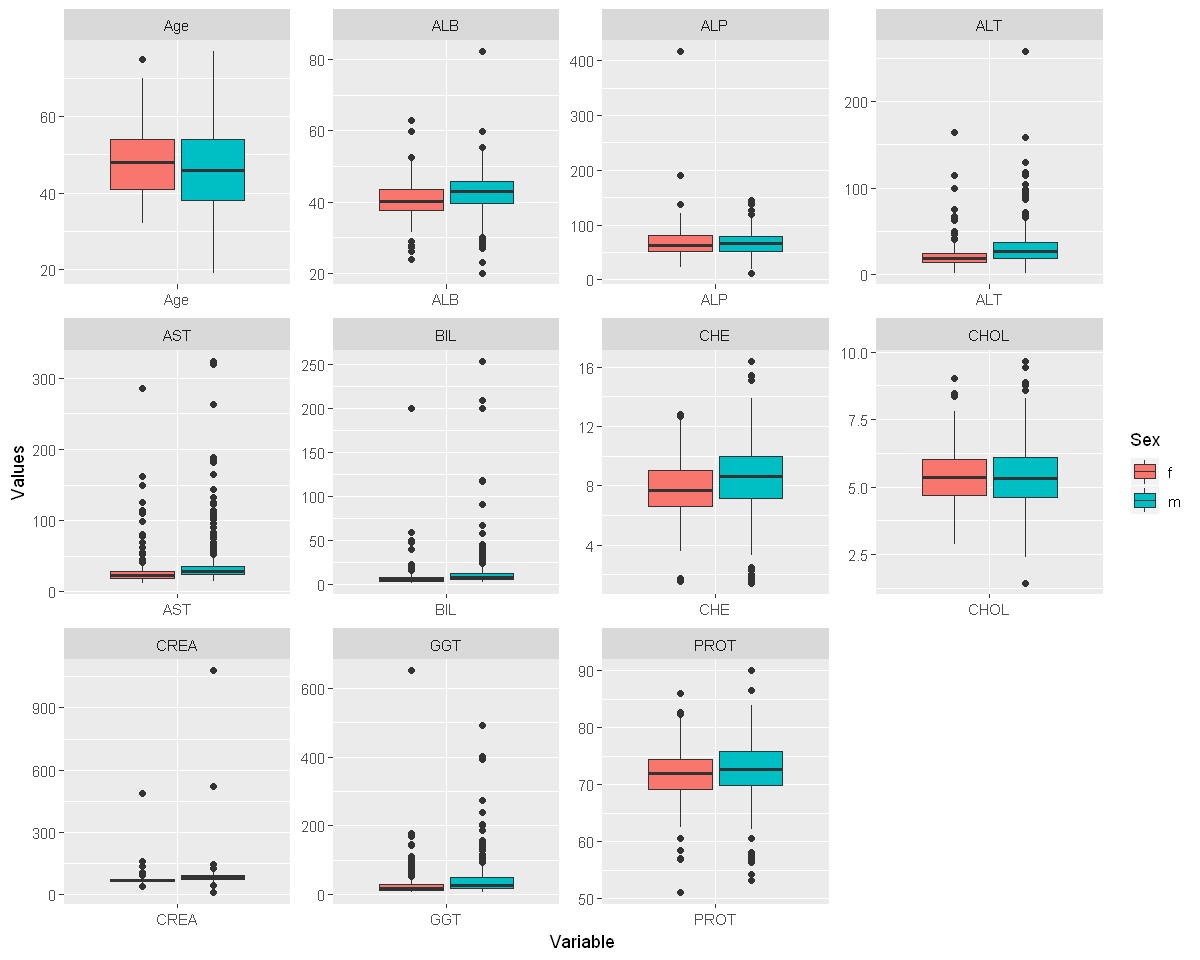

In [23]:
# melt the dataframe into suitable shape for plotting
hepc.mgc <- melt(hepc[, c(numeric_cols, 'Sex')], id.var='Sex')

# change the width and height option
options(repr.plot.width=10, repr.plot.height=8) 
box_plot.gc <- ggplot(data = hepc.mgc, aes(x=variable, y=value)) + 
            geom_boxplot(aes_string(fill='Sex')) + 
            facet_wrap( ~ variable, scales='free') + 
            xlab('Variable') + ylab('Values')
box_plot.gc 

In general. Most of the data seems scatter in the same range and does not differ much comparitively. Hence we will not use gender in this data.

In [24]:
hepc.summary_gc <- describeBy(hepc, "general_category", mat=TRUE)
hepc.summary_gc[, c('group1', 'median', 'min', 'max', 'skew')]

group1      median min   max     skew       
Category*1         Blood Donor  1.000  1.00    1.00         NaN
Category*2         Hepatitis    3.000  2.00    4.00  0.14921159
Age1               Blood Donor 47.000 32.00   77.00  0.34451198
Age2               Hepatitis   49.000 19.00   75.00 -0.17730027
Sex*1              Blood Donor  2.000  1.00    2.00 -0.39280867
Sex*2              Hepatitis    2.000  1.00    2.00 -0.88975022
ALB1               Blood Donor 42.200 26.20   82.20  0.88423628
ALB2               Hepatitis   39.000 20.00   50.00 -0.62362973
ALP1               Blood Donor 66.700 27.00  145.00  0.63658855
ALP2               Hepatitis   39.600 11.30  416.60  4.37289886
ALT1               Blood Donor 23.100  2.50  118.10  2.18870403
ALT2               Hepatitis   15.000  0.90  258.00  2.40297932
AST1               Blood Donor 24.800 12.00  188.70  7.34704293
AST2               Hepatitis   68.900 16.70  324.00  1.78254518
BIL1               Blood Donor  6.900  1.80   59.10  3.14723548
BIL2               Hepatitis   14.000  5.00  254.00  2.98157449
CHE1               Blood Donor  8.350  3.90   15.43  0.39179784
CHE2               Hepatitis    7.100  1.42   16.41  0.03255105
CHOL1              Blood Donor  5.405  2.79    9.43  0.49042008
CHOL2              Hepatitis    4.310  1.43    9.67  1.04186043
CREA1              Blood Donor 78.000  8.00  127.00  0.07019661
CREA2              Hepatitis   70.900 45.40 1079.10  5.71734449
GGT1               Blood Donor 21.400  4.50  239.00  3.22028313
GGT2               Hepatitis   65.600 11.50  650.90  2.71711331
PROT1              Blood Donor 72.200 51.00   86.50 -0.49145111
PROT2              Hepatitis   72.800 54.20   90.00 -0.38942629
general_category*1 Blood Donor  1.000  1.00    1.00         NaN
general_category*2 Hepatitis    2.000  2.00    2.00         NaN

The summary above is more or less a similar analysis with boxplot. However we could observe the skewness.

Huge difference of skewness (more than 1.0) between groups
- ALP
- AST
- CREA

Different direction of skewness between groups:
- Age
- ALB

So from here, we make assumptions that the patient using min max and median,
- ALB: decrease in Hepatitis patient.
- ALP: decrease / huge increase in Hepatitis patient.
- ALT: decrease / huge increase in Hepatitis patient.
- AST: huge increase in Hepatitis patient.
- BIL: increase in Hepatitis patient.
- CHE: decrease / slight increase in Hepatitis patient.
- CHOL: decrease / slight increase in Hepatitis patient.
- CREA: huge increase in Hepatitis patient.
- GGT: huge increase in Hepatitis patient.
- PROT: increase in Hepatitis patient. However the range of Hepatitis is about the same with normal blood donor.

## Correlation Plot

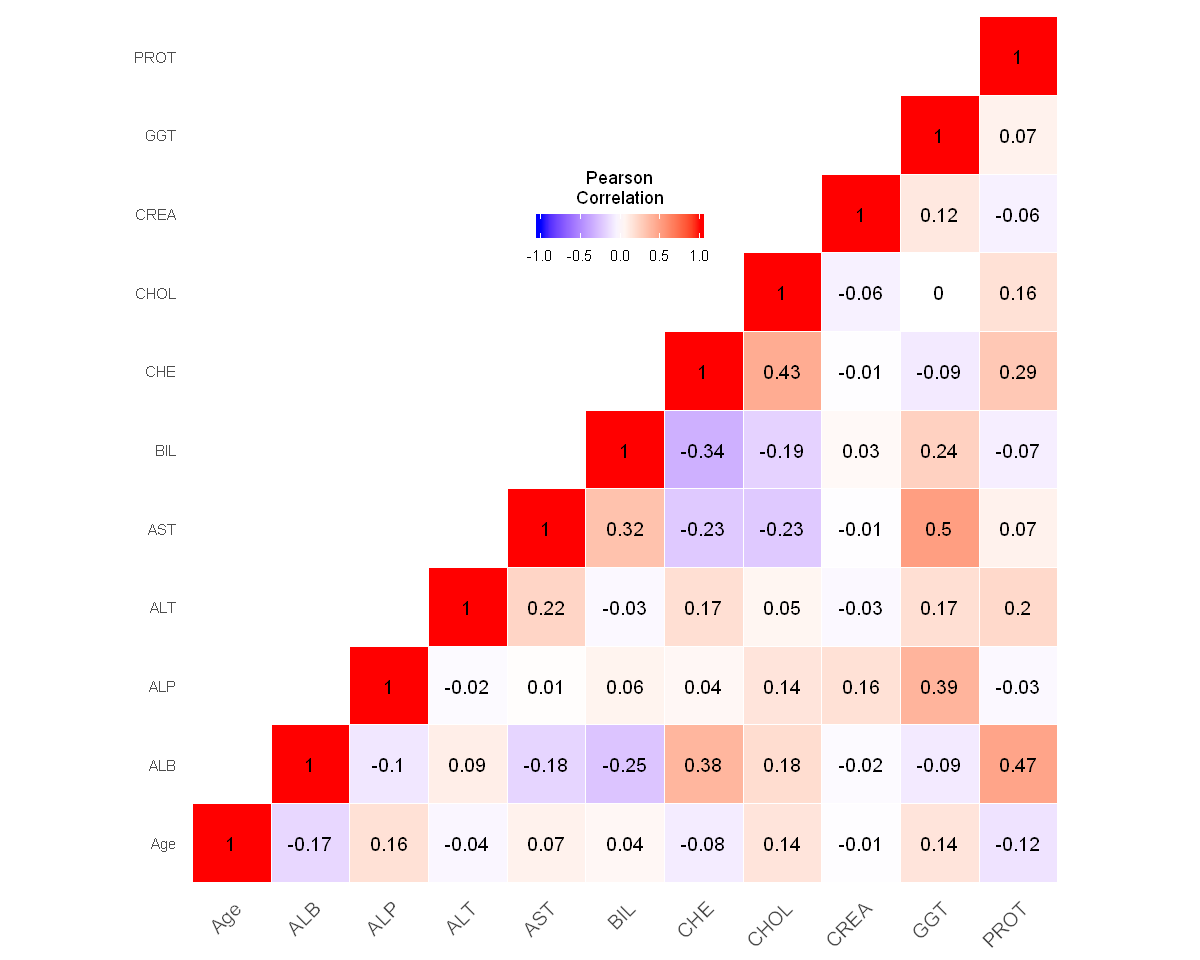

In [25]:
hepc.correlation <- round(cor(hepc[, numeric_cols]),2)

melted_cormat <- melt(hepc.correlation)

# Reorder the correlation matrix
cormat <- reorder_cormat(hepc.correlation)
upper_tri <- get_upper_tri(hepc.correlation)

# Melt the correlation matrix
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Create a ggheatmap
ggheatmap <- (ggplot(melted_cormat, aes(Var2, Var1, fill = value)) + 
              geom_tile(color = 'white') +
              scale_fill_gradient2(low = 'blue', high = 'red', mid = 'white', 
                                   midpoint = 0, limit = c(-1,1), space = 'Lab', 
                                   name='Pearson\nCorrelation') +
              theme_minimal() +
              theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                               size = 12, hjust = 1)) +
              coord_fixed()
             )

ggheatmap + 
geom_text(aes(Var2, Var1, label = value), color = 'black', size = 4) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = 'horizontal')+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = 'top', title.hjust = 0.5))

In [26]:
sort(rowSums(abs(cormat)))

CREA  Age  ALT  ALP PROT  BIL CHOL  GGT  AST  ALB  CHE 
1.51 1.97 2.02 2.11 2.54 2.57 2.58 2.81 2.84 2.93 3.06

Looking at correlation matrix, those that have higher correlation with each other are:
- CHE
- ALB
- AST
- GGT
- CHOL

and also, it seems our PROT is correlated with ALB where it's a ratio of it as mentioned in data preview.

## Conclusion

Based on the analysis above, we might interested to look into different combination of variables instead of plotting the all the variables. The combination of variables will be:
- ALP, AST, CREA, ALB
- CHE, ALB, AST, GGT, CHOL
- CREA. ALT, ALP, PROT, BIL
- ALP, ALT, AST, GGT, CREA

# Scatterplot

Due to the different range of value for each columns, hence we used scale value to have a better look.

## Cols

In [27]:
cols.1 <- c('ALP', 'AST', 'CREA', 'ALB')
cols.2 <- c('CHE', 'ALB', 'AST', 'GGT', 'CHOL')
cols.3 <- c('CREA', 'ALT', 'ALP', 'PROT', 'BIL')
cols.4 <- c('ALP', 'ALT', 'AST', 'GGT', 'CREA')

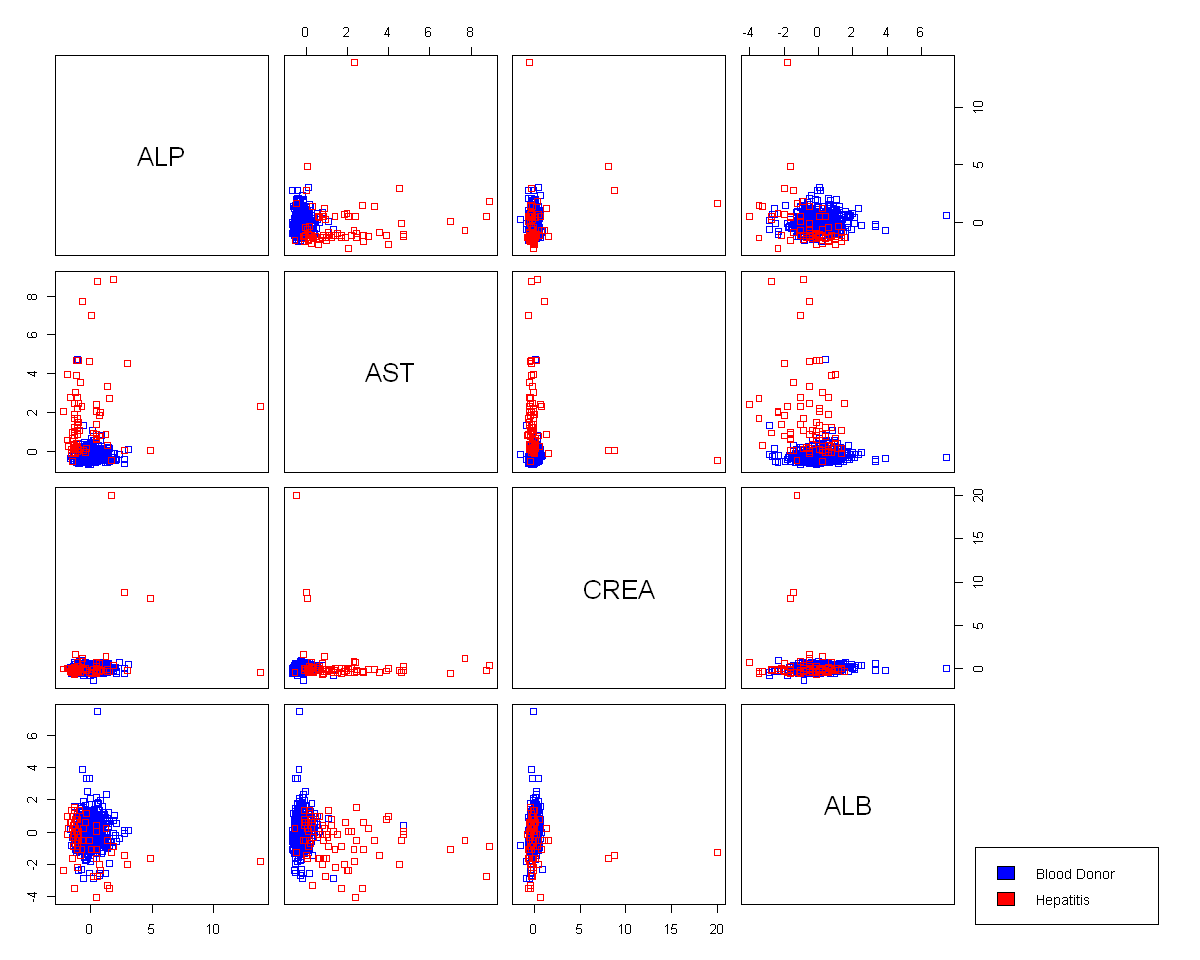

In [28]:
pairs(hepc.sc[, cols.1], pch=0, col=c('blue', 'red')[unclass(as.factor(hepc$general_category))], oma=c(3, 3, 3, 15))
par(xpd=TRUE)
legend("bottomright", fill = c('blue', 'red'), legend = c(levels(hepc$general_category)), cex=0.7)

Assumptions: Seems like ALP & AST can be a good pair to seperate the variables.

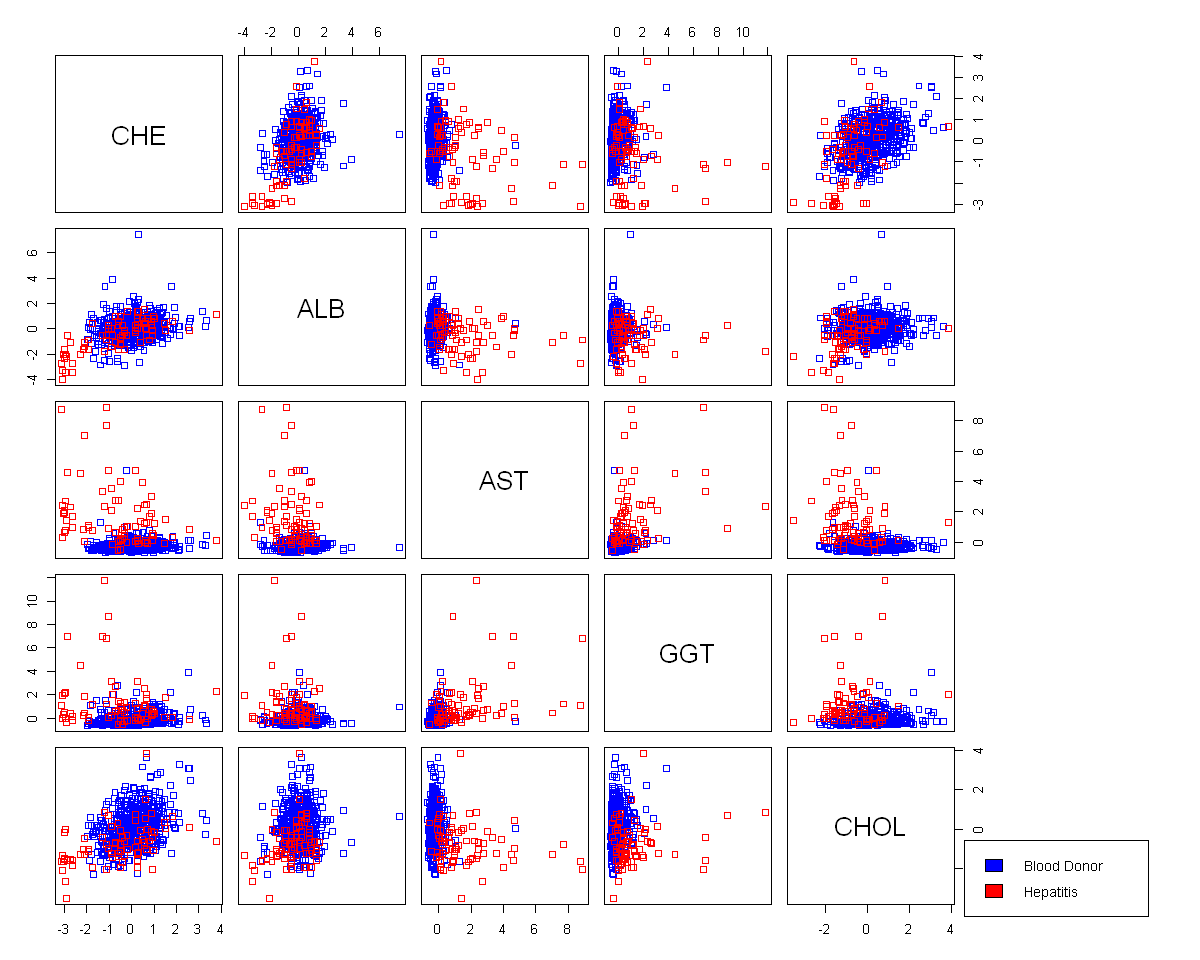

In [29]:
pairs(hepc.sc[, cols.2], pch=0, col=c('blue', 'red')[unclass(as.factor(hepc$general_category))], oma=c(3, 3, 3, 15))
par(xpd=TRUE)
legend("bottomright", fill = c('blue', 'red'), legend = c(levels(hepc$general_category)), cex=0.7)

These highly correlated columns have both samples overlap with each other.

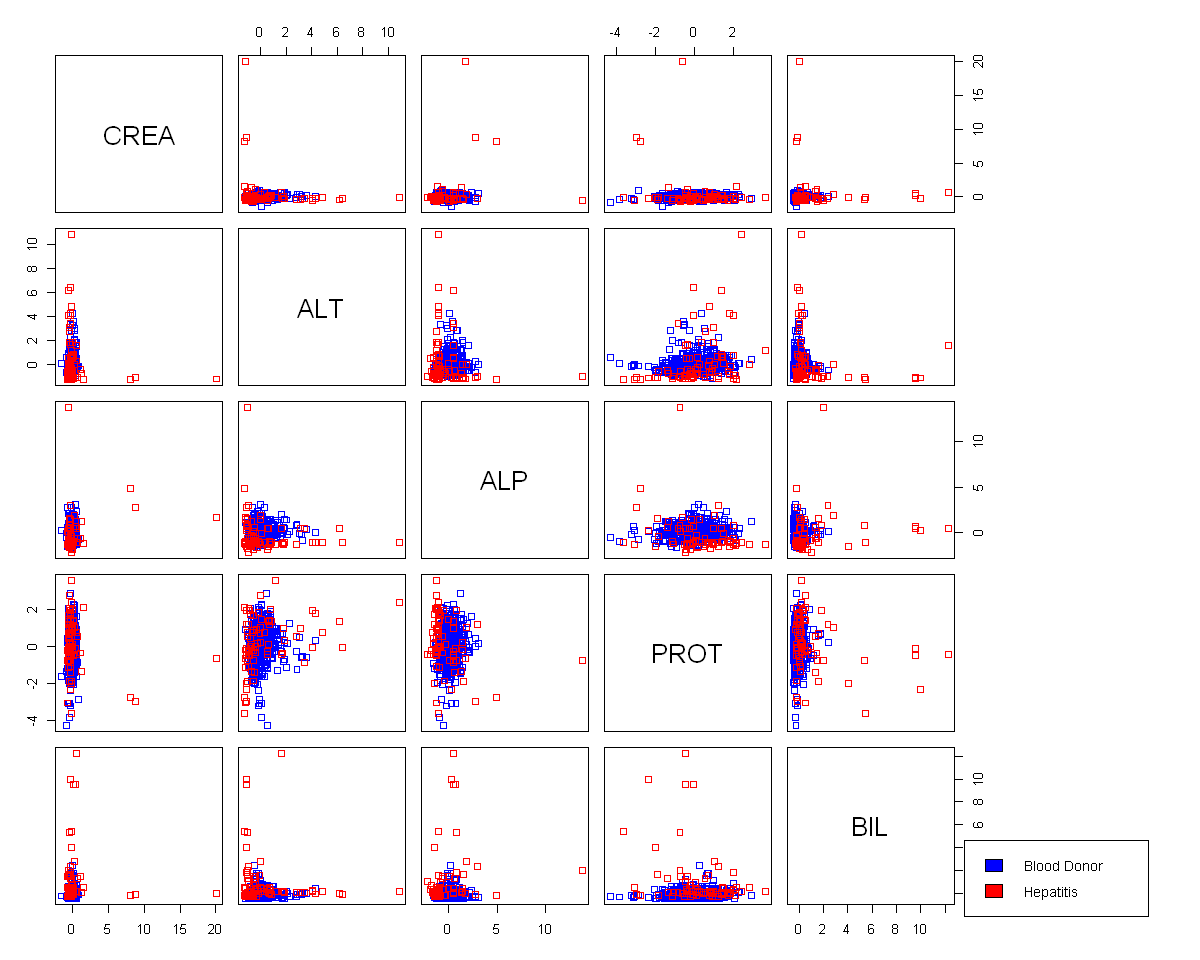

In [30]:
pairs(hepc.sc[, cols.3], pch=0, col=c('blue', 'red')[unclass(as.factor(hepc$general_category))], oma=c(3, 3, 3, 15))
par(xpd=TRUE)
legend("bottomright", fill = c('blue', 'red'), legend = c(levels(hepc$general_category)), cex=0.7)

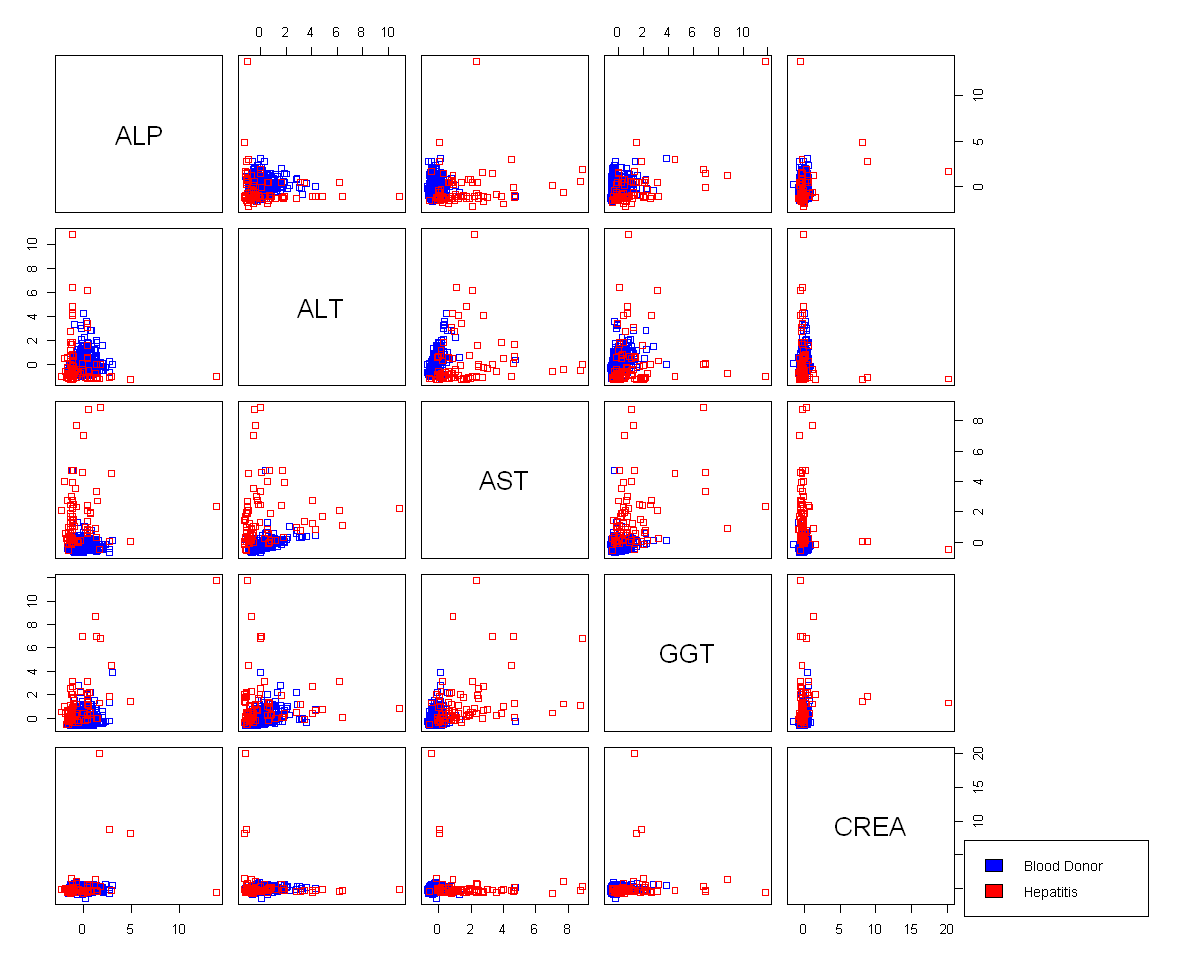

In [31]:
pairs(hepc.sc[, cols.4], pch=0, col=c('blue', 'red')[unclass(as.factor(hepc$general_category))], oma=c(3, 3, 3, 15))
par(xpd=TRUE)
legend("bottomright", fill = c('blue', 'red'), legend = c(levels(hepc$general_category)), cex=0.7)

# PCA

## PCA on selected columns

In [32]:
selected_cols

[1] "ALB"  "ALP"  "ALT"  "AST"  "BIL"  "CHE"  "CHOL" "CREA" "GGT"  "PROT"

Call:
princomp(x = hepc.sc[, selected_cols])

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
1.5379529 1.3261651 1.1562314 0.9910577 0.9414517 0.8452842 0.7897791 0.7050328 
   Comp.9   Comp.10 
0.6864452 0.5895823 

 10  variables and  608 observations.


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
ALB   0.428  0.192  0.189  0.366  0.274  0.158         0.249  0.622  0.238 
ALP          0.299 -0.621         0.155  0.336  0.468        -0.133  0.363 
ALT          0.406  0.276 -0.163 -0.675 -0.147  0.464         0.163        
AST  -0.364  0.401  0.293                      -0.486        -0.131  0.596 
BIL  -0.399  0.122  0.100         0.411 -0.666  0.331  0.303               
CHE   0.475  0.202 -0.131        -0.139 -0.149 -0.159  0.677 -0.420        
CHOL  0.347  0.172 -0.338 -0.413  0.117 -0.475 -0.294 -0.390  0.254  0.151 
CREA               -0.394  0.768 -0.326 -0.314 -0.140 -0.121               
GGT  -0.273  0.547 -0.174                0.216 -0.262         0.258 -0.635 
PROT  0.289  0.397  0.299  0.240  0.361         0.125 -0.450 -0.493 -0.146 

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings       1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    

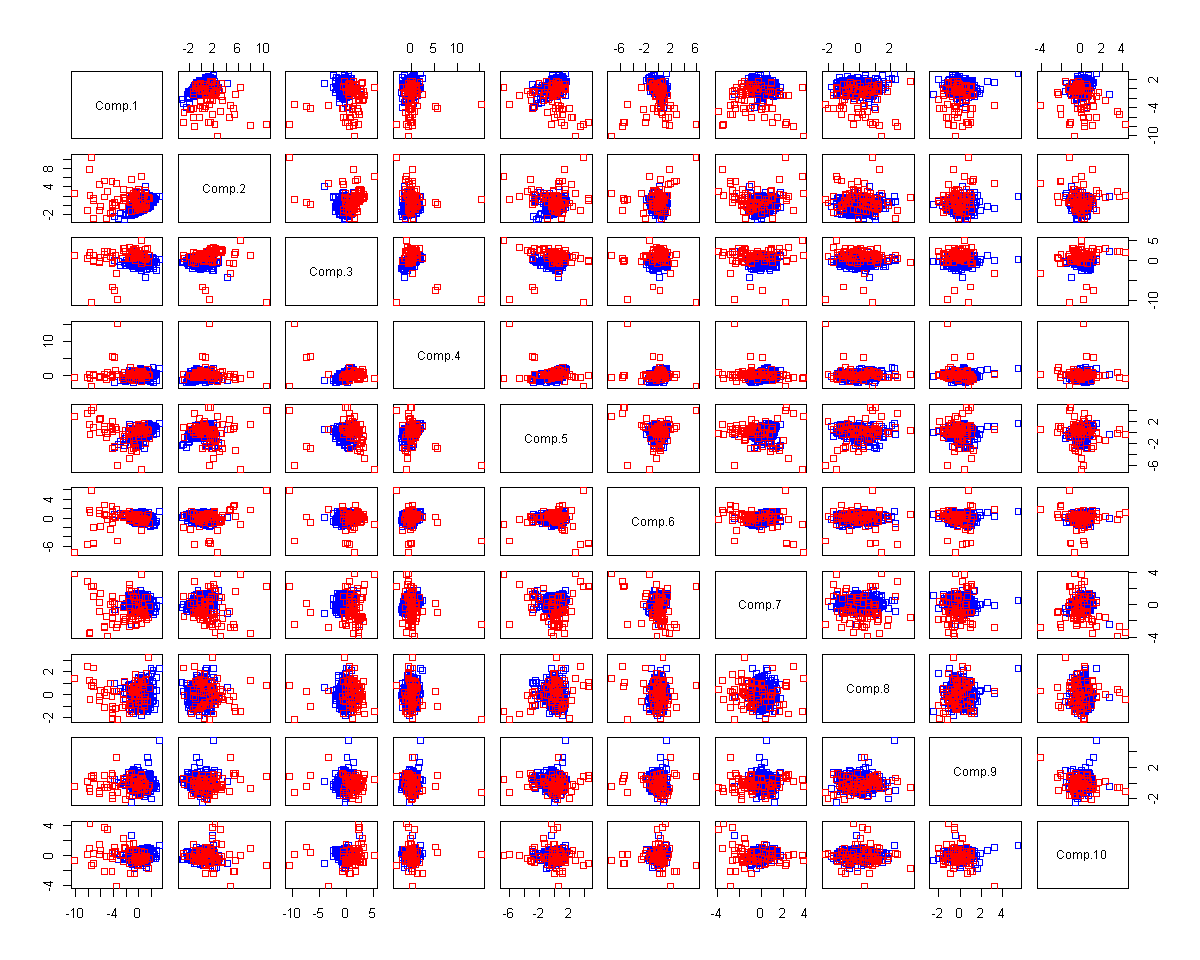

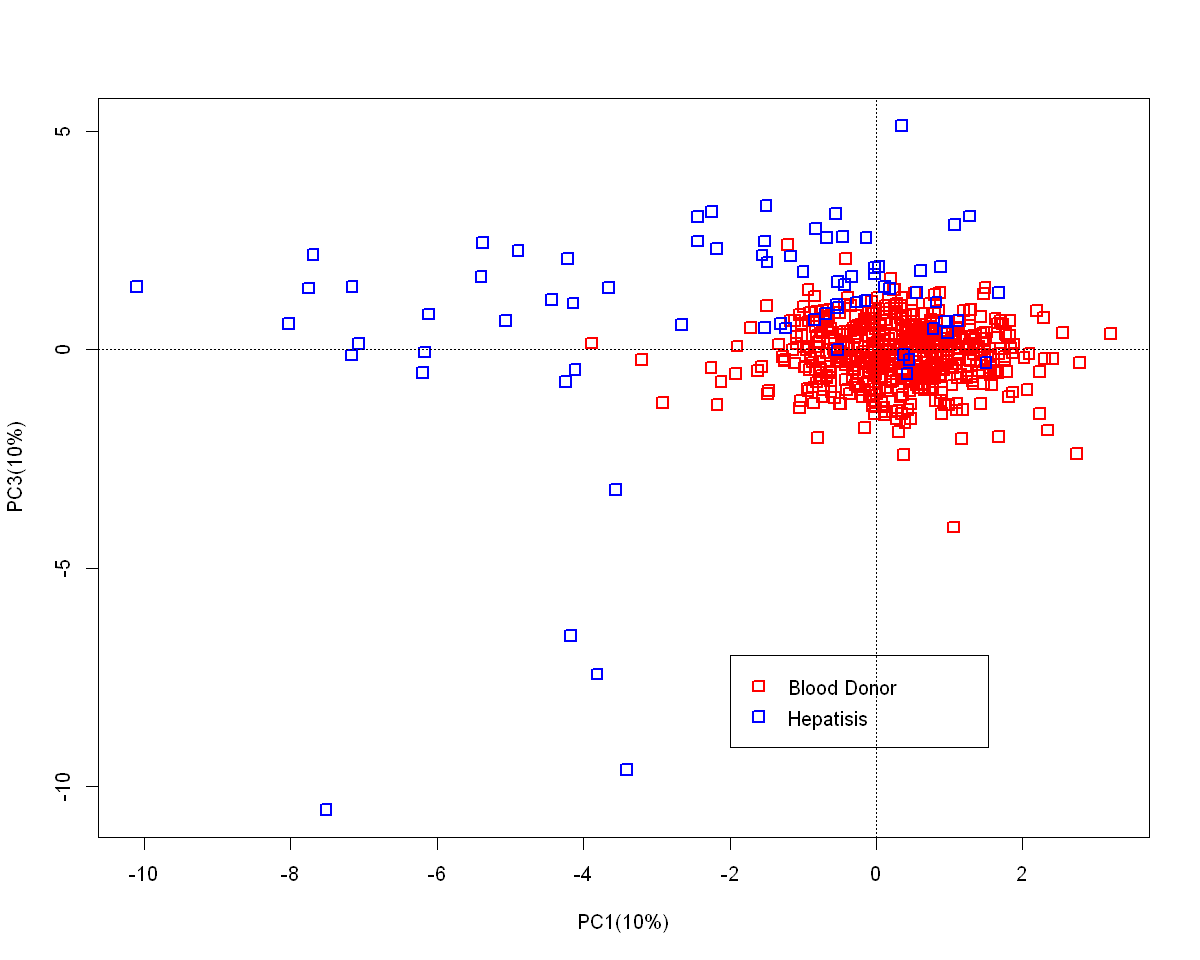

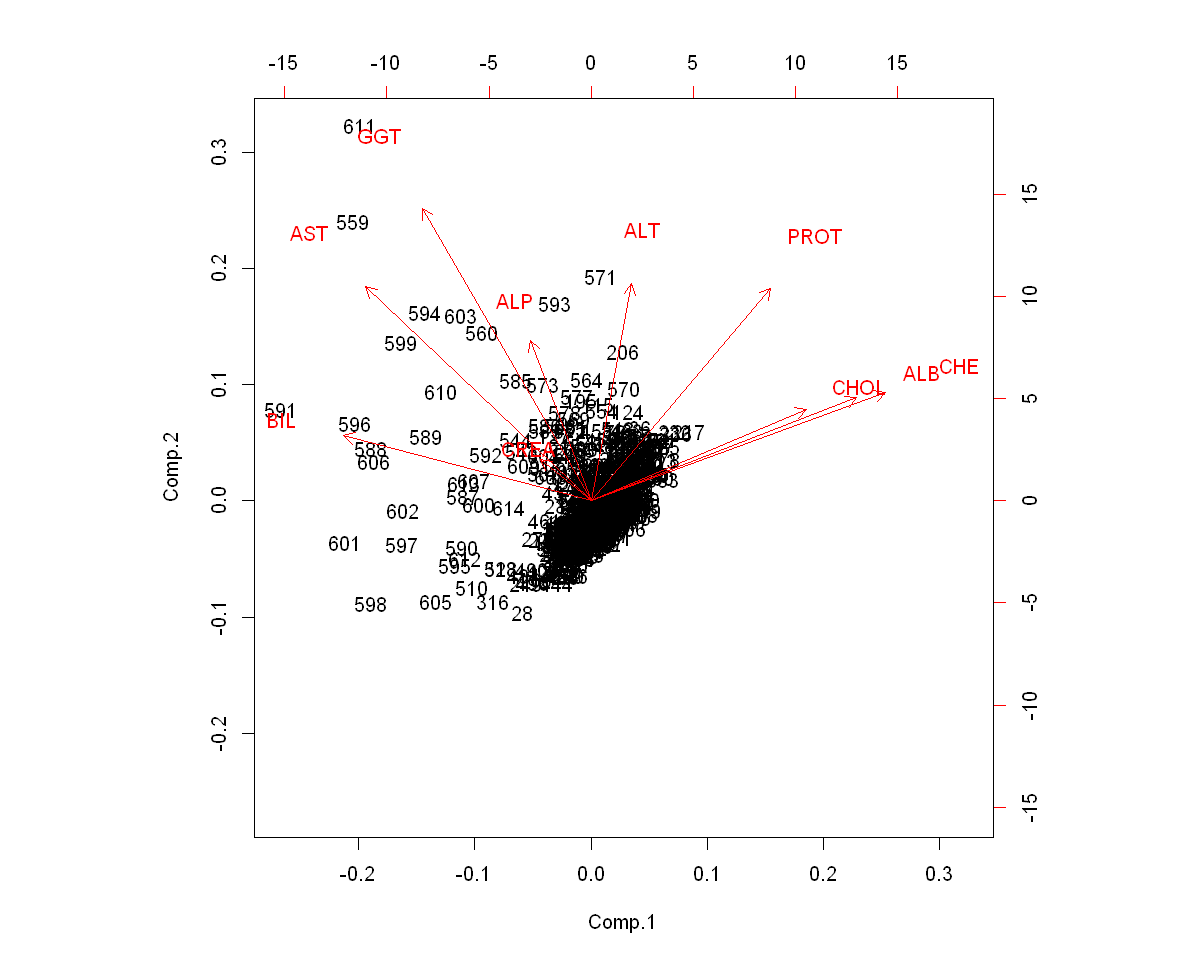

In [33]:
hepc.pca.selected_cols <- princomp(hepc.sc[, selected_cols])
hepc.pca.selected_cols
hepc.pca.selected_cols$loadings

# plot all the pc
pairs(hepc.pca.selected_cols$scores, pch=0, col=c('blue', 'red')[unclass(as.factor(hepc$general_category))])

# plot pc1 against pc3
class_color <- c("red","blue")
plot(hepc.pca.selected_cols$scores[,1], hepc.pca.selected_cols$scores[,3], 
col=class_color[unclass(hepc$general_category)], 
cex=1.2, lwd=2, pch=0, 
xlab="PC1(10%)", ylab="PC3(10%)")

legend(-2, -7, pch=rep(0,4), pt.cex=1.2, pt.lwd=2,
col=class_color, c("Blood Donor", "Hepatisis" ))

abline(h=0,v=0, lty=3)

biplot(hepc.pca.selected_cols)

In general this selected columns seems to be mixed together.

## PCA on Cols.1

In [34]:
cols.1

[1] "ALP"  "AST"  "CREA" "ALB"

Call:
princomp(x = hepc.sc[, cols.1])

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.1118899 1.0588757 0.9222197 0.8862364 

 4  variables and  608 observations.


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4
ALP   0.528  0.456  0.519  0.494
AST   0.458 -0.558 -0.464  0.514
CREA  0.383  0.596 -0.648 -0.279
ALB  -0.604  0.354 -0.309  0.644

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

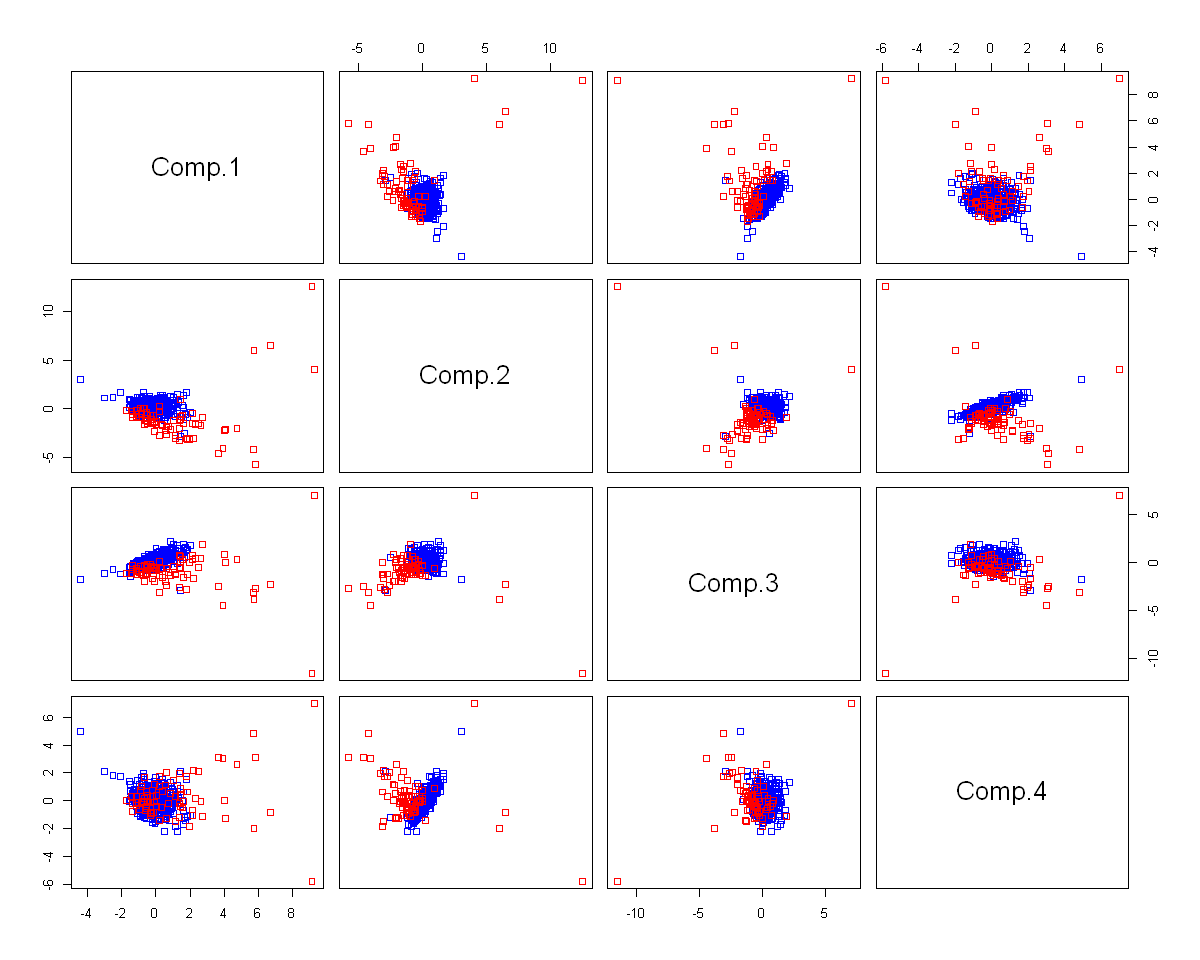

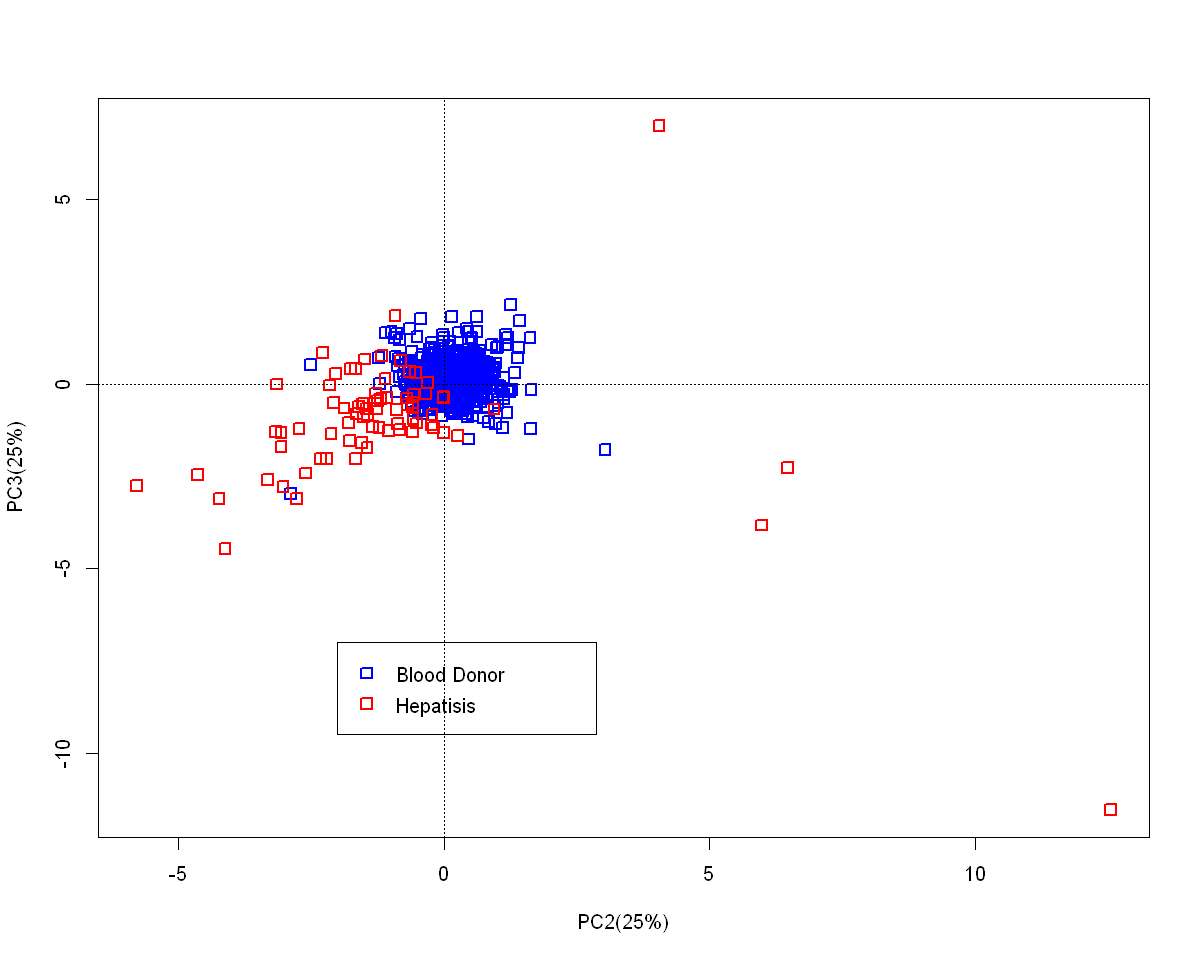

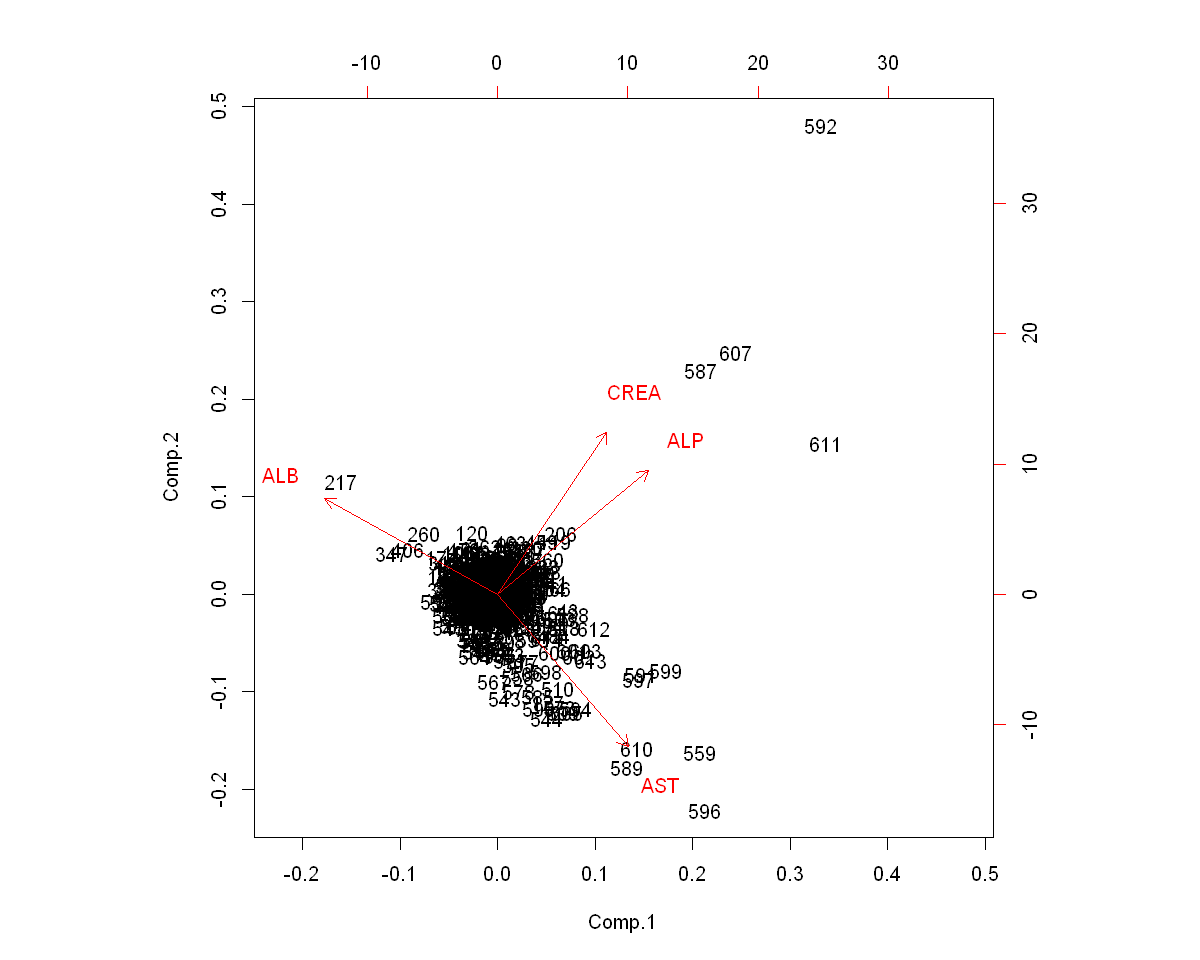

In [35]:
hepc.pca.cols.1 <- princomp(hepc.sc[, cols.1])
hepc.pca.cols.1
hepc.pca.cols.1$loadings

# plot all the pc
pairs(hepc.pca.cols.1$scores, pch=0, col=c('blue', 'red')[unclass(as.factor(hepc$general_category))])

# plot pc1 against pc3
class_color <- c('blue','red')
plot(hepc.pca.cols.1$scores[,2], hepc.pca.cols.1$scores[,3], 
col=class_color[unclass(hepc$general_category)], 
cex=1.2, lwd=2, pch=0, 
xlab='PC2(25%)', ylab='PC3(25%)')

legend(-2, -7, pch=rep(0,4), pt.cex=1.2, pt.lwd=2,
col=class_color, c('Blood Donor', 'Hepatisis' ))

abline(h=0,v=0, lty=3)

biplot(hepc.pca.cols.1)

Based on the scatter plot, it seems that it does not separate the Hepatitis patient from blood donor well.

## PCA on Cols.2

Call:
princomp(x = hepc.sc[, cols.2])

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.3939865 1.1187716 0.9111453 0.7225193 0.6668643 

 5  variables and  608 observations.


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
CHE   0.520  0.363         0.736  0.237
ALB   0.419  0.249  0.772 -0.381 -0.149
AST  -0.496  0.454  0.163  0.331 -0.642
GGT  -0.350  0.671        -0.274  0.591
CHOL  0.431  0.387 -0.613 -0.359 -0.400

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

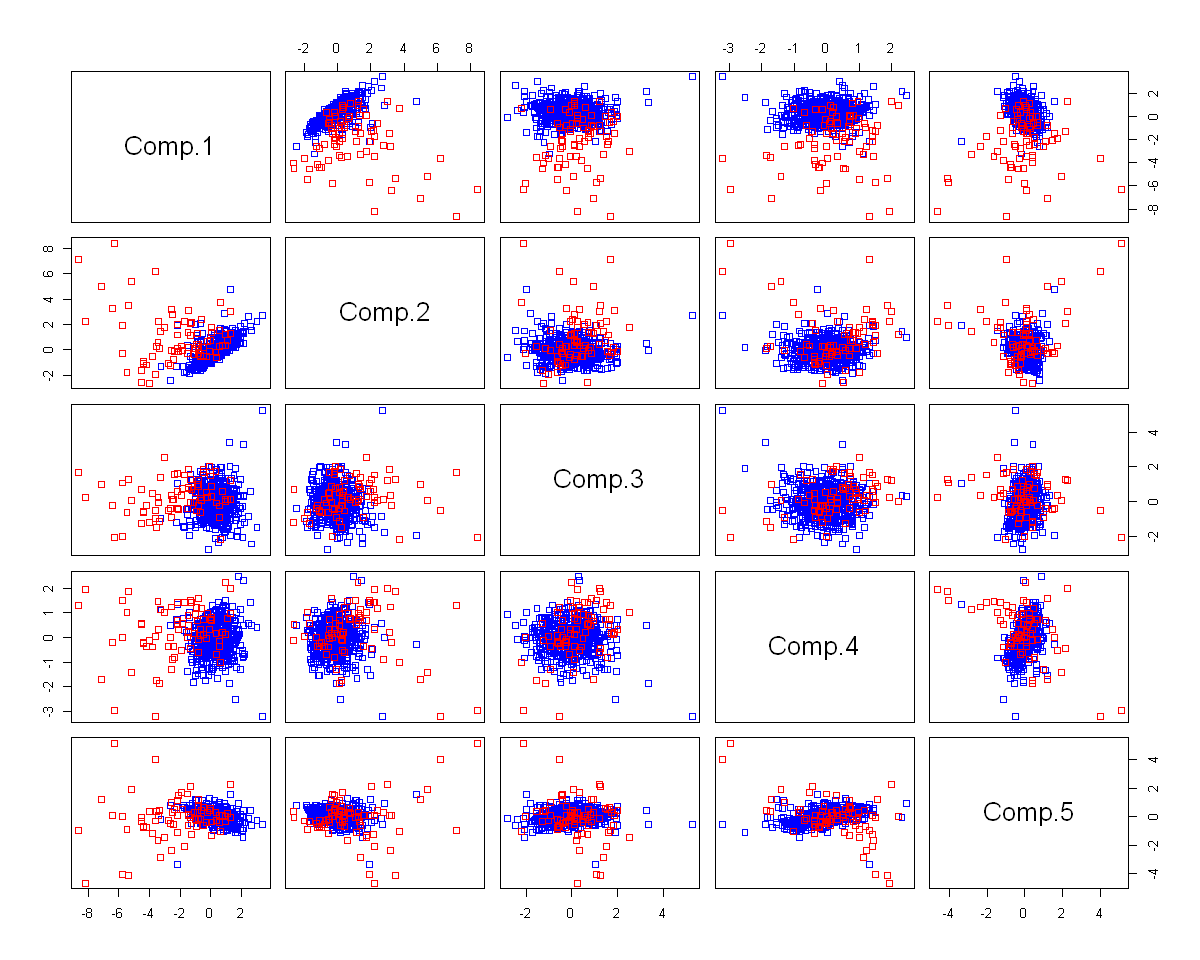

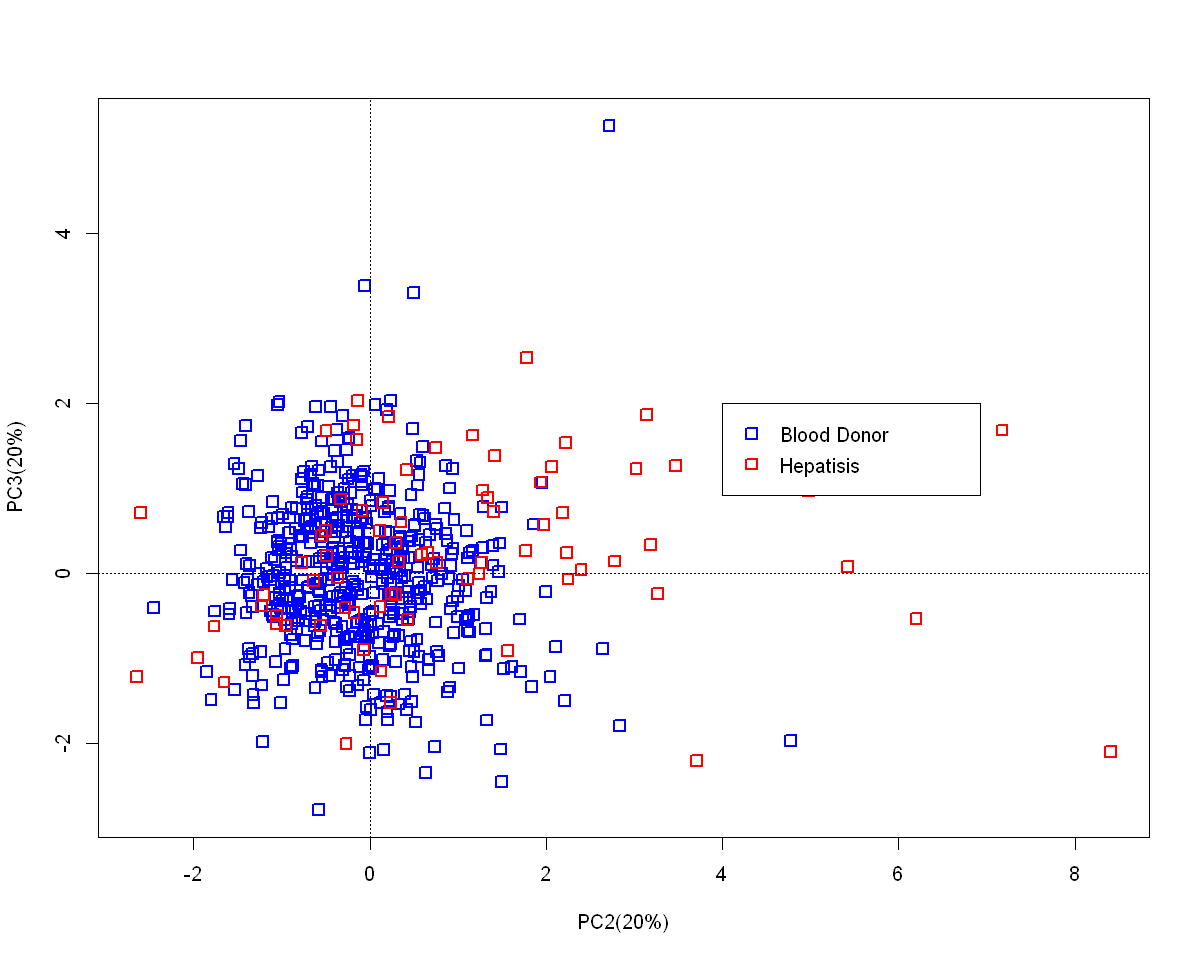

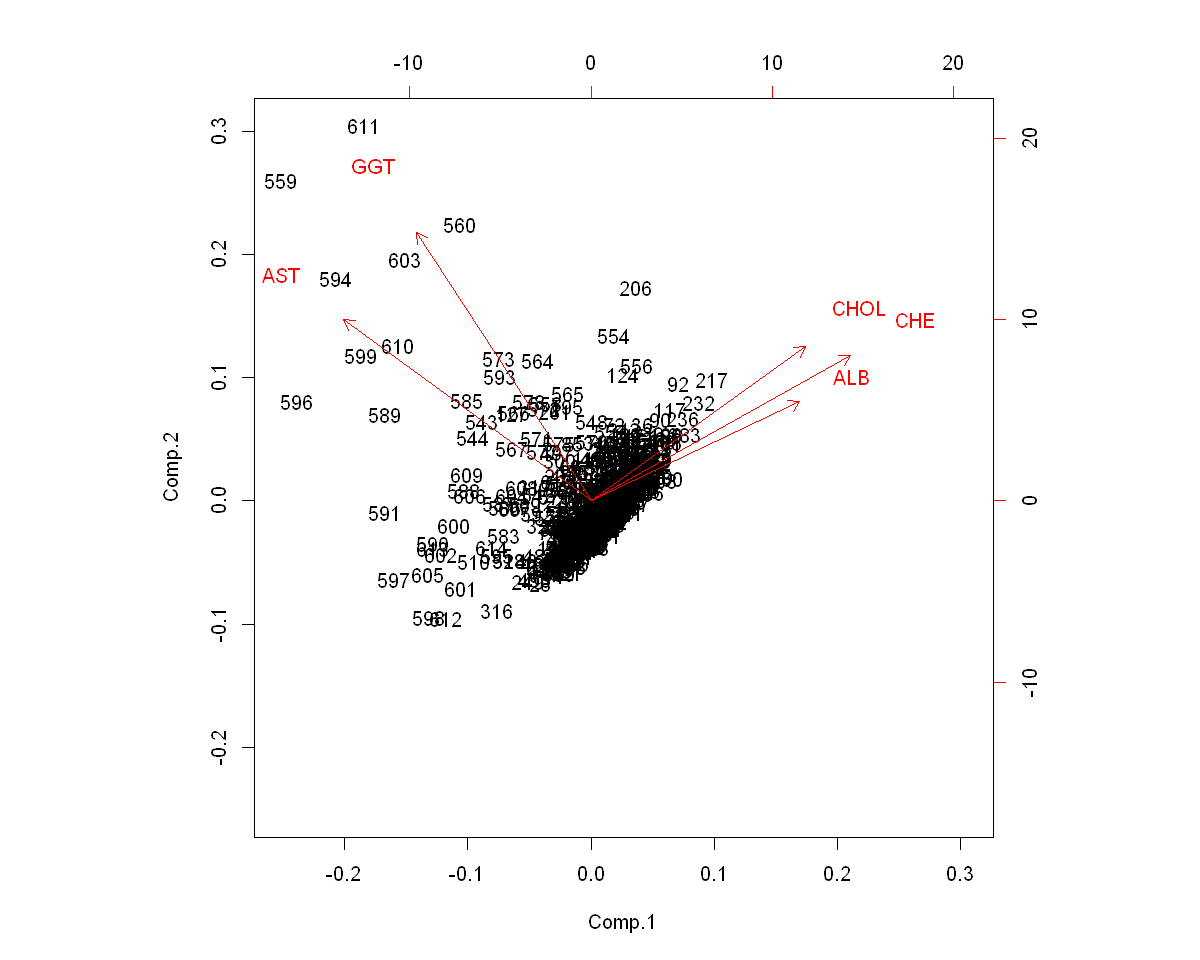

In [36]:
hepc.pca.cols.2 <- princomp(hepc.sc[, cols.2])
hepc.pca.cols.2
hepc.pca.cols.2$loadings

# plot all the pc
pairs(hepc.pca.cols.2$scores, pch=0, col=c('blue', 'red')[unclass(as.factor(hepc$general_category))])

# plot pc1 against pc3
class_color <- c('blue','red')
plot(hepc.pca.cols.2$scores[,2], hepc.pca.cols.2$scores[,3], 
col=class_color[unclass(hepc$general_category)], 
cex=1.2, lwd=2, pch=0, 
xlab='PC2(20%)', ylab='PC3(20%)')

legend(4, 2, pch=rep(0,4), pt.cex=1.2, pt.lwd=2,
col=class_color, c('Blood Donor', 'Hepatisis' ))

abline(h=0,v=0, lty=3)

biplot(hepc.pca.cols.2)

Cols.2 doesnt seems working.

## PCA on Cols.3

Call:
princomp(x = hepc.sc[, cols.3])

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.1361188 1.0512940 0.9861997 0.9131094 0.8885002 

 5  variables and  608 observations.


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
CREA  0.431  0.495  0.321  0.661  0.170
ALT  -0.497  0.494 -0.184  0.212 -0.656
ALP   0.401  0.579        -0.698 -0.112
PROT -0.556  0.410                0.714
BIL   0.313        -0.925  0.146  0.135

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

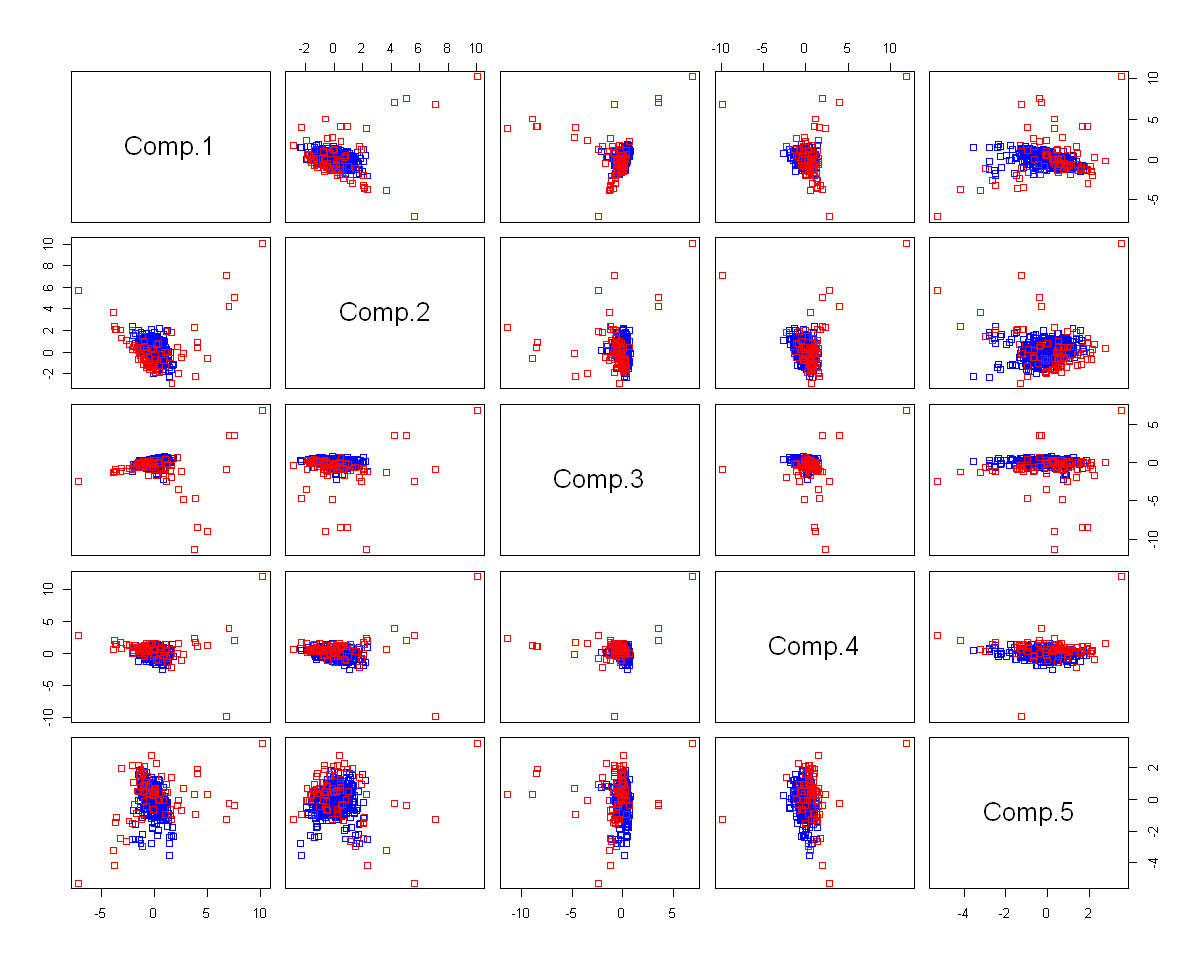

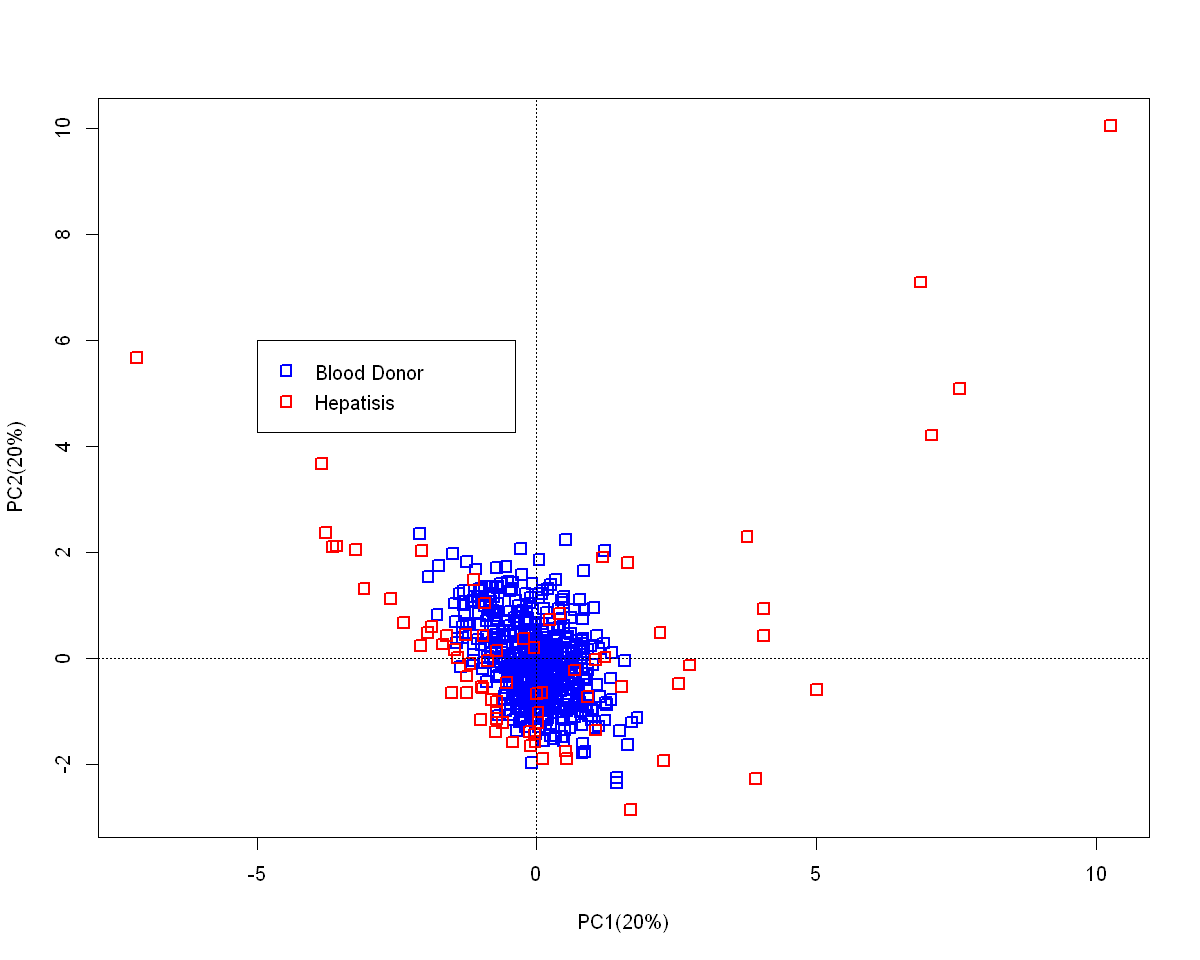

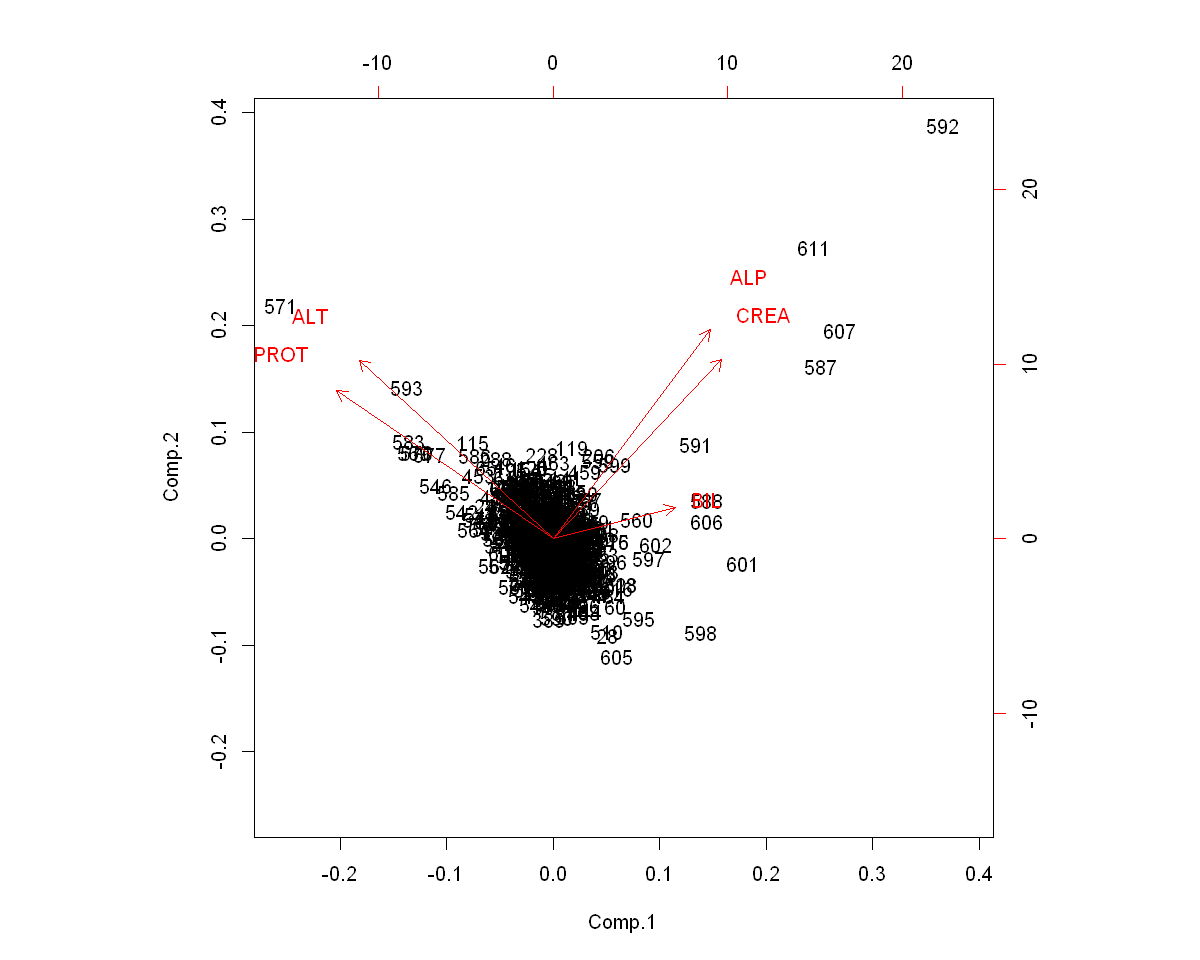

In [37]:
hepc.pca.cols.3 <- princomp(hepc.sc[, cols.3])
hepc.pca.cols.3
hepc.pca.cols.3$loadings

# plot all the pc
pairs(hepc.pca.cols.3$scores, pch=0, col=c('blue', 'red')[unclass(as.factor(hepc$general_category))])

# plot pc1 against pc3
class_color <- c('blue','red')
plot(hepc.pca.cols.3$scores[,1], hepc.pca.cols.3$scores[,2], 
col=class_color[unclass(hepc$general_category)], 
cex=1.2, lwd=2, pch=0, 
xlab='PC1(20%)', ylab='PC2(20%)')

legend(-5, 6, pch=rep(0,4), pt.cex=1.2, pt.lwd=2,
col=class_color, c('Blood Donor', 'Hepatisis' ))

abline(h=0,v=0, lty=3)

biplot(hepc.pca.cols.3)

The cols.3 seems to be better but there's alot of noise within the diabetes cluster.

## PCA on Cols.4

Call:
princomp(x = hepc.sc[, cols.4])

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.3161079 1.0995802 0.9356271 0.8968803 0.6089067 

 5  variables and  608 observations.


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
ALP   0.389  0.553  0.339  0.497  0.425
ALT   0.293 -0.486 -0.513  0.644       
AST   0.537 -0.382        -0.506  0.553
GGT   0.666         0.183        -0.714
CREA  0.173  0.557 -0.765 -0.270       

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

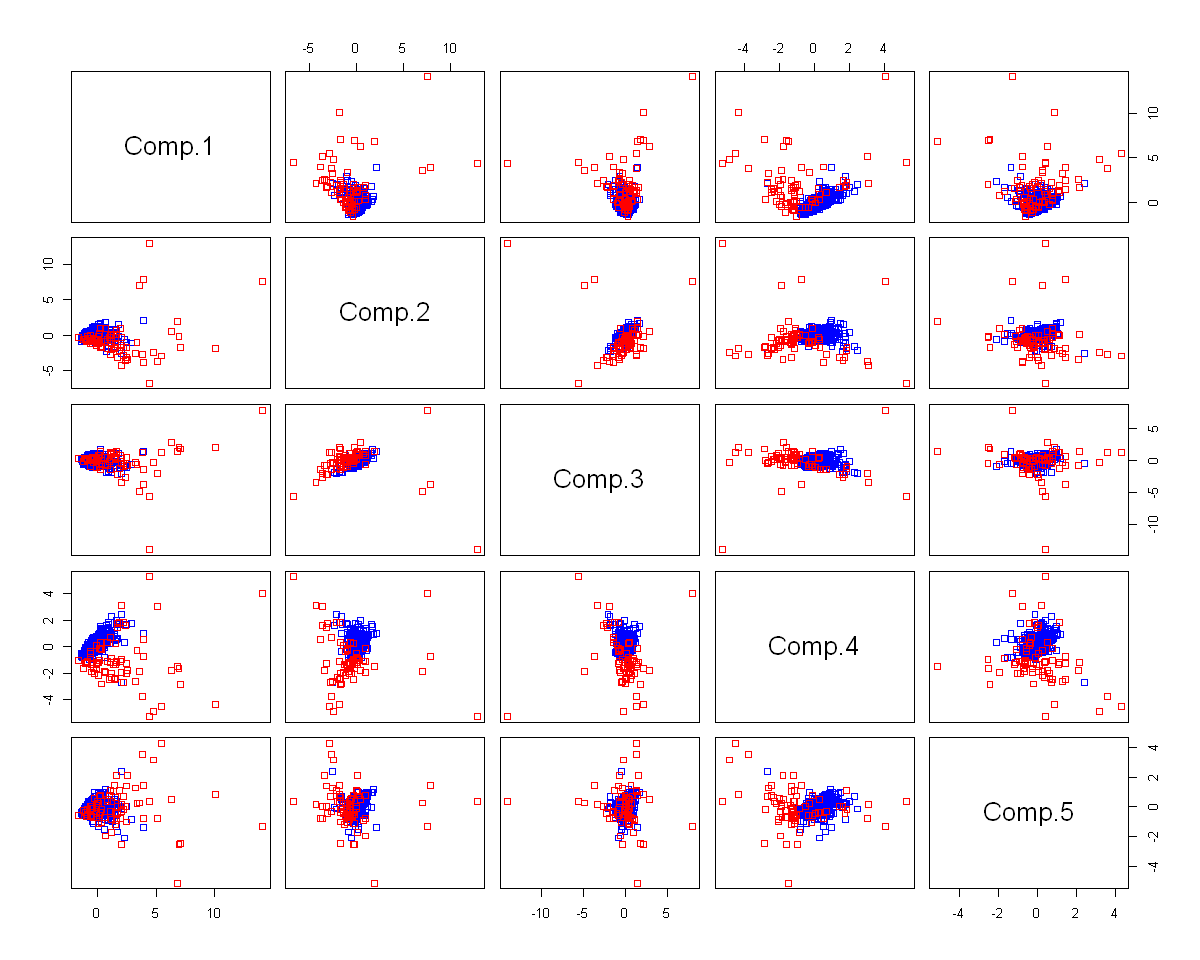

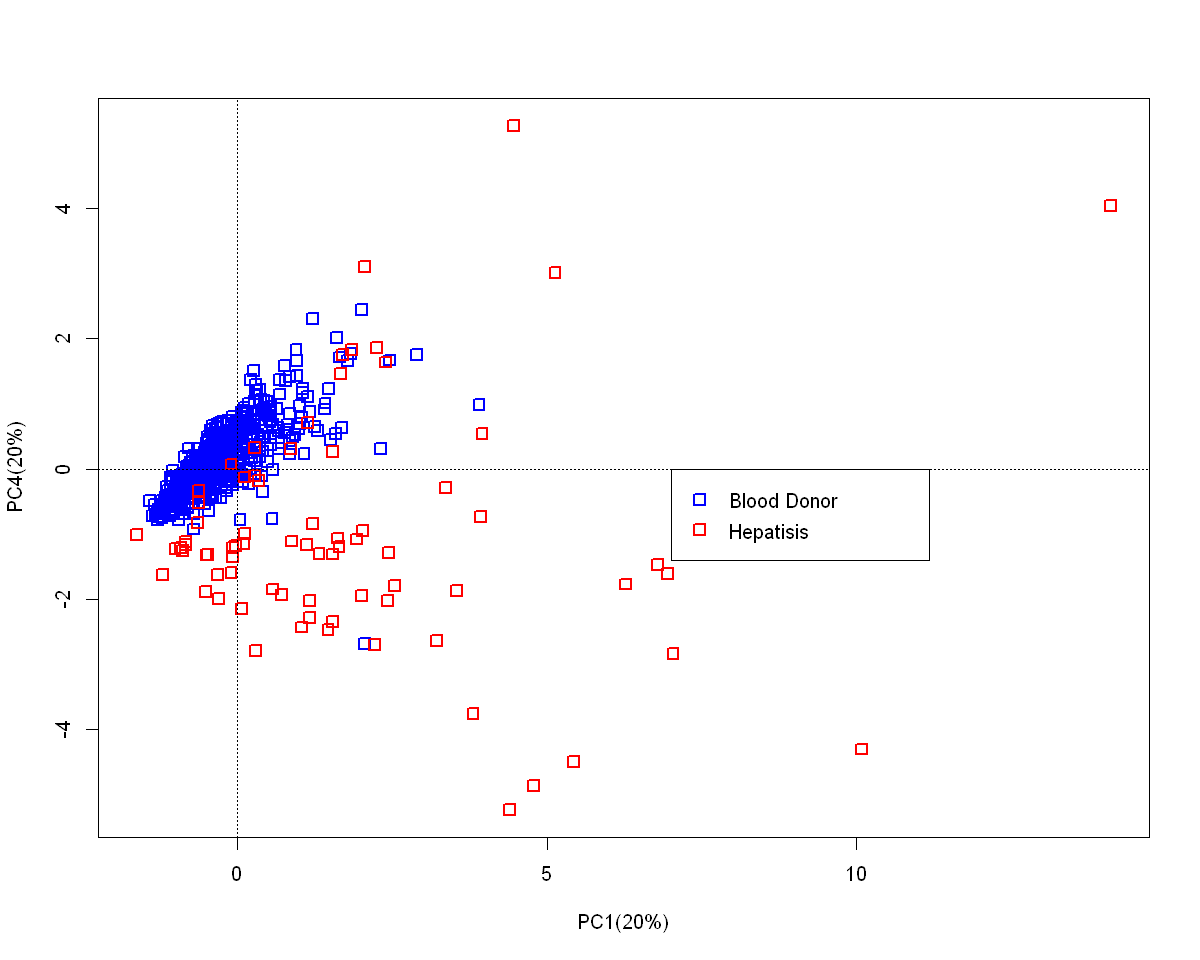

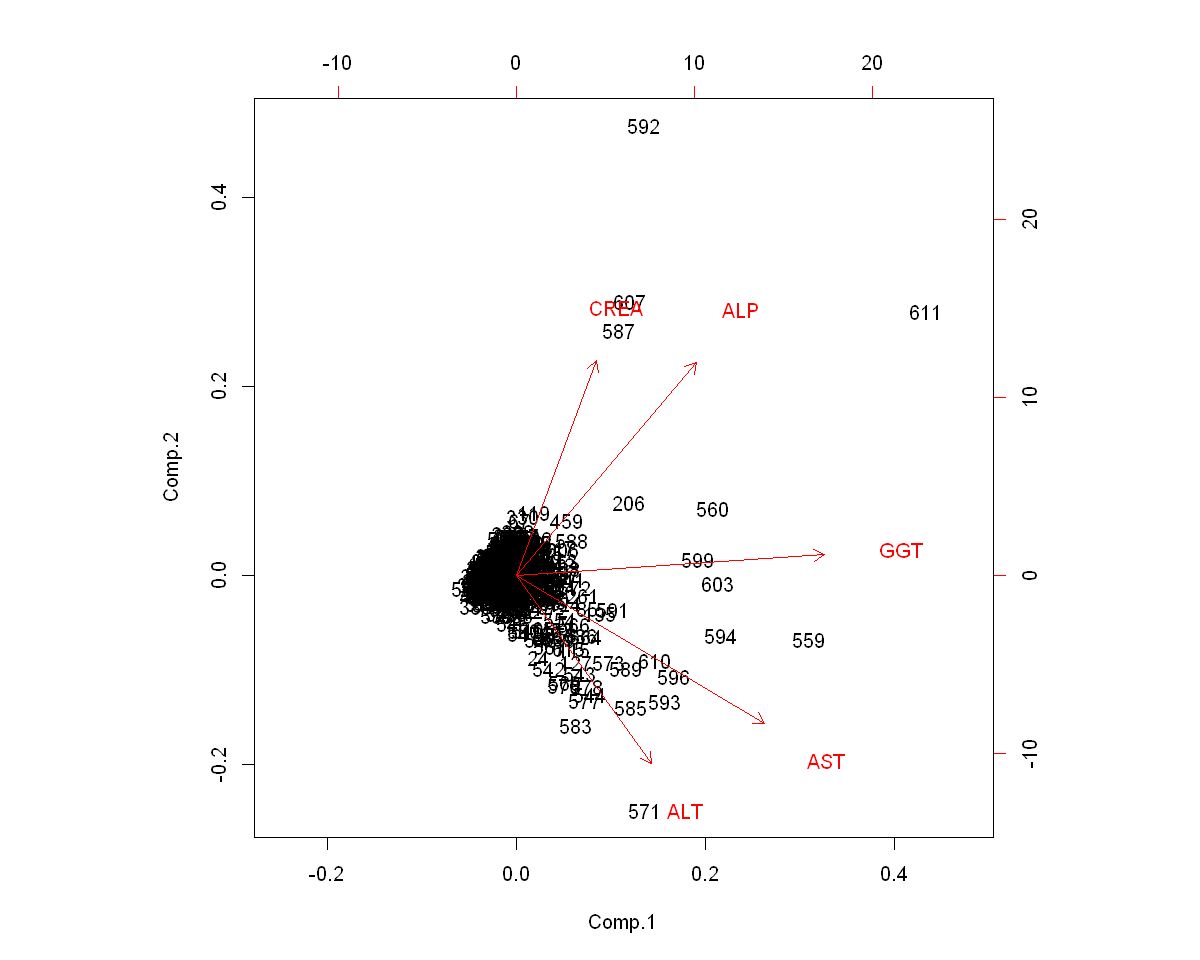

In [38]:
hepc.pca.cols.4 <- princomp(hepc.sc[, cols.4])
hepc.pca.cols.4
hepc.pca.cols.4$loadings

# plot all the pc
pairs(hepc.pca.cols.4$scores, pch=0, col=c('blue', 'red')[unclass(as.factor(hepc$general_category))])

# plot pc1 against pc3
class_color <- c('blue','red')
plot(hepc.pca.cols.4$scores[,1], hepc.pca.cols.4$scores[,4], 
col=class_color[unclass(hepc$general_category)], 
cex=1.2, lwd=2, pch=0, 
xlab='PC1(20%)', ylab='PC4(20%)')

legend(7, 0, pch=rep(0,4), pt.cex=1.2, pt.lwd=2,
col=class_color, c('Blood Donor', 'Hepatisis' ))

abline(h=0,v=0, lty=3)

biplot(hepc.pca.cols.4)

## Conclusion

Seems like for Cols.4 can have a better separation compare to others for component1 and component4
The variable includes in Cols.4 are 
- ALP 
- ALT 
- AST 
- GGT 
- CREA

# Feature Selection

## Recursive Feature Elimination

The samples codes are from [machine learning mastery](https://machinelearningmastery.com/feature-selection-with-the-caret-r-package/).

Recursive feature elimination is a feature selection method that fits a model and removes the weakest feature until the specified number of features is reached. Feature are ranked using feature importance / coefficient. RFE attempts to eliminate dependencies and collinearity that may exist in the model.



Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.9162 0.5932    0.03687 0.18651         
         2   0.9687 0.8495    0.01444 0.07070         
         3   0.9753 0.8855    0.01408 0.06509         
         4   0.9786 0.8961    0.01554 0.07900         
         5   0.9786 0.8953    0.01548 0.08021         
         6   0.9786 0.8951    0.01559 0.08056         
         7   0.9802 0.9020    0.01698 0.08667         
         8   0.9770 0.8816    0.02195 0.12048         
         9   0.9819 0.9105    0.01630 0.08386        *
        10   0.9819 0.9105    0.01630 0.08386         
        11   0.9803 0.9010    0.01851 0.09725         
        12   0.9803 0.9010    0.01851 0.09725         

The top 5 variables (out of 9):
   AST, ALP, ALT, GGT, BIL



[1] "AST"  "ALP"  "ALT"  "GGT"  "BIL"  "CHE"  "PROT" "CREA" "CHOL"

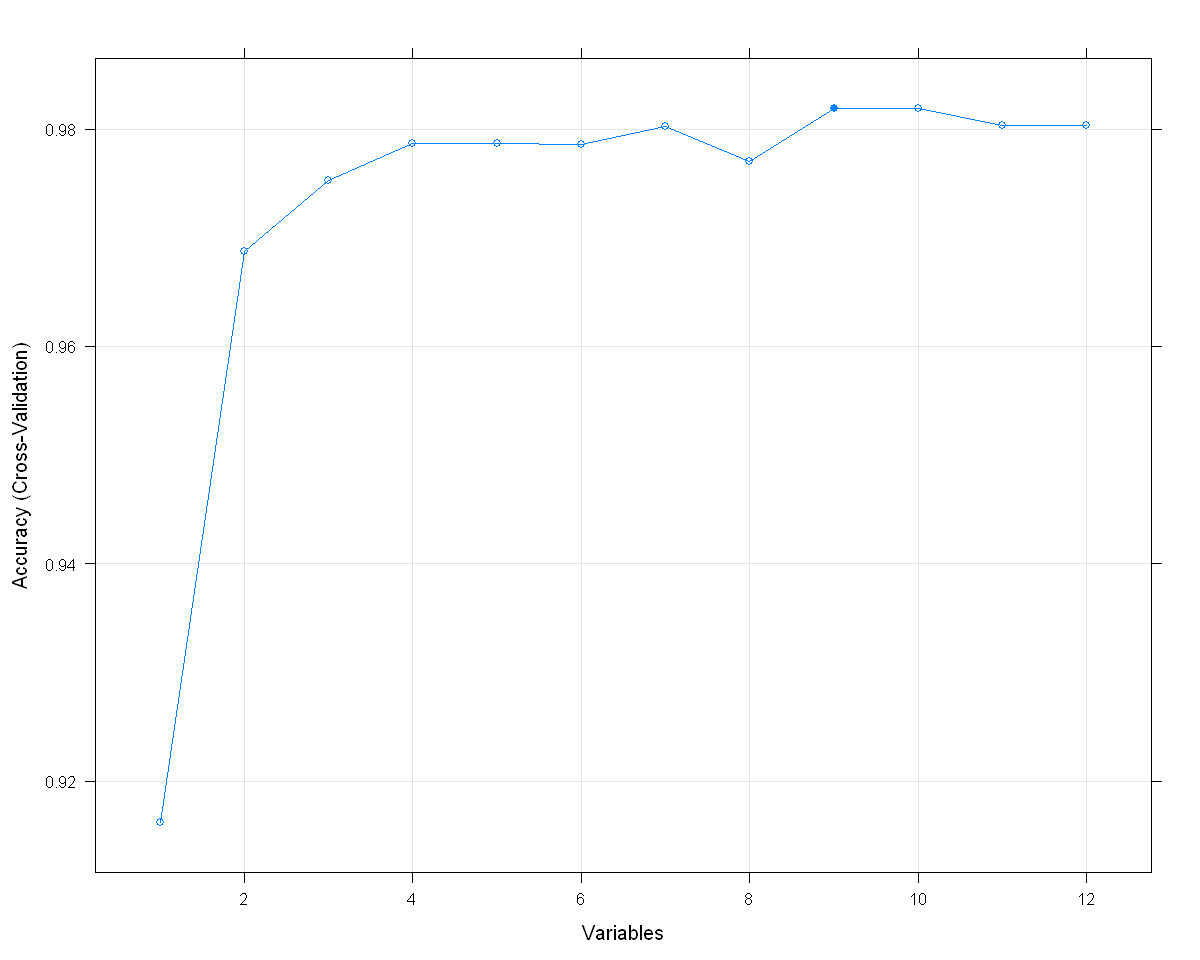

In [39]:
set.seed(1)
control <- rfeControl(functions=rfFuncs, method="cv", number=10)
results <- rfe(hepc[, 2:13], hepc$general_category, size=c(1:12),  rfeControl=control)
print(results)
predictors(results)
plot(results, type=c("g", "o"))

### Conclusion
The top 5 variables shown are <b> AST, ALP, ALT, GGT, </b> CHE which matching with 4 of the columns from our pca using <b> AST, ALP, ALT, GGT, </b> CREA in our pca.cols.4


However, from the accuracy graph, we can observe that it's having a highest accuracy with top 11 features (exclude the ALB). However the accuracy of the features have little improvement when using 5-10 features. Hence, if we are trying to use lesser features to predict Hepatitis patients, top 3 features will be the best at the moment.

## Chi Squared Test

In [40]:
chisq.test(hepc$general_category, hepc$Sex)


	Pearson's Chi-squared test with Yates' continuity correction

data:  hepc$general_category and hepc$Sex
X-squared = 2.9007, df = 1, p-value = 0.08854


In [41]:
table(hepc[, c('general_category', 'Sex')])

                Sex
general_category   f   m
     Blood Donor 215 318
     Hepatitis    22  53

Even though the p-value is 0.08 which is more than alpha 0.05 (set by ourselve). Doesnt seems convincing as male have more patients in general.

## F Test

In [42]:
f_test_result <- lapply(hepc[, c(-1, -3, -14)], function(x) var.test(x~hepc$general_category)$p.value)
f_test_result <- data.frame(numeric_cols, matrix(f_test_result))
names(f_test_result) <- c('column', 'p_value')
f_test_result$p_value <- as.numeric(f_test_result$p_value)
f_test_result[order(f_test_result$p_value),]

column p_value      
9  CREA   1.741086e-252
6  BIL    8.455062e-223
5  AST    4.007455e-170
10 GGT    1.217315e-115
4  ALT     1.659104e-63
3  ALP     1.170148e-52
7  CHE     1.251760e-13
11 PROT    3.089745e-08
2  ALB     1.102065e-04
1  Age     2.415326e-03
8  CHOL    1.985901e-01

Based on F Test result, the top 5 most significant are CREA, BIL, AST, GGT, ALT

# 3D Scatter  Plot

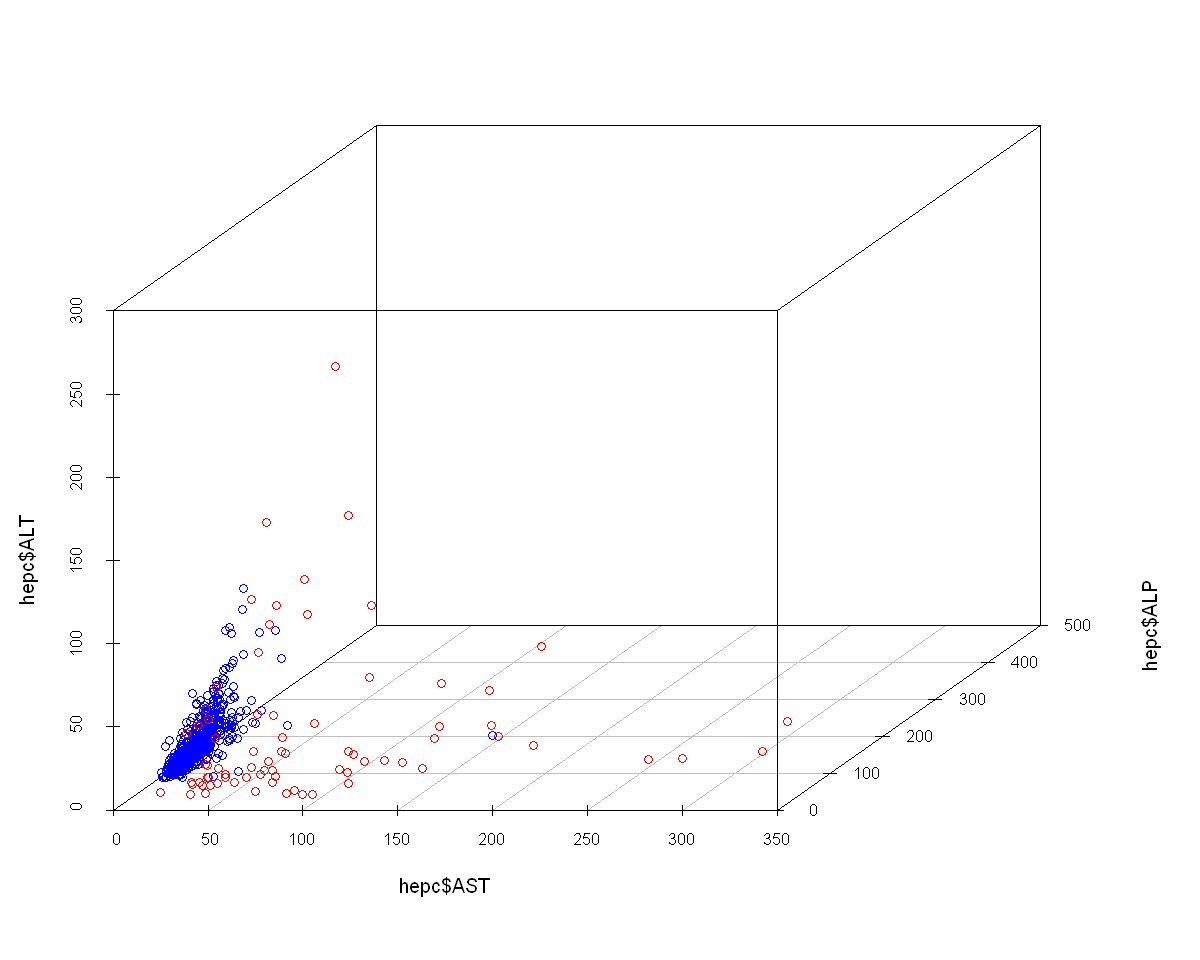

In [50]:
colors <- c('blue', 'red')[as.numeric(hepc$general_category)]
scatterplot3d(x=hepc$AST, y=hepc$ALP, z=hepc$ALT,  color=colors)


In [44]:
fig <- plot_ly(hepc, x= ~AST, y= ~ALP, z= ~ALT, color=~general_category, colors= c('blue', 'red'))
fig <- fig %>% add_markers()
fig <- fig %>% layout(scene= list(xaxis = list(title='AST'),
                                  yaxis = list(title='ALP'),
                                  zaxis = list(title='ALT')))
fig

HTML widgets cannot be represented in plain text (need html)

In [56]:
htmlwidgets::saveWidget(as_widget(fig), "index.html")

From the plot, we can observe that AST more than certain treshold (50), and extremely low / high level of ALT, can differentiate the Hepatitis Patient.